# 11 - Neural Networks 
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3-neuron and 4-neuron Hidden layers. How do these results compare to the 2 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Instead of `SGD` try other optimizers and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Nadam

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Model Notation: 

Example - "model_lay_one_two" translates to one layer, and two neurons per layer

Example - "model_lay_two_three" translates to two layers, and three neurons per layer



LABABIDI CAUTION: Please note that for questions 1-4 I ran into an issue with replicating my layer/neuron modificaitons in a linear, systematic, fashon after defining my dataset. Something with .fit or .reshape would alter my outputs, resulting in a systematic error that I could not put my finger on. As a result of my failure to find the reason for this I re-defined my random dataset for EACH modification. A means to the same end, as I was able to identify the optimal NN configuration regardless (I believe). 

# Part 1 Question 1: Two Neurons per Layer

One Layer

In [2]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [3]:
#one layer, two neurons
model_lay_one_two = Sequential()

#hidden layers
model_lay_one_two.add(Dense(2, input_dim=2, activation='tanh')) 

#output layer
model_lay_one_two.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_one_two.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_one_two.fit(X, y, batch_size=2, epochs=400)
print(model_lay_one_two.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_one_two = model_lay_one_two.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 860us/step - loss: 0.7508
Epoch 2/400
160/160 [==============================] - 0s 218us/step - loss: 0.7293
Epoch 3/400
160/160 [==============================] - 0s 228us/step - loss: 0.7134
Epoch 4/400
160/160 [==============================] - 0s 224us/step - loss: 0.7015
Epoch 5/400
160/160 [==============================] - 0s 212us/step - loss: 0.6918
Epoch 6/400
160/160 [==============================] - 0s 228us/step - loss: 0.6843
Epoch 7/400
160/160 [==============================] - 0s 218us/step - loss: 0.6775
Epoch 8/400
160/160 [==============================] - 0s 218us/step - loss: 0.6728
Epoch 9/400
160/160 [==============================] - 0s 221us/step - loss: 0.6682
Epoch 10/400
160/160 [==============================] - 0s 224us/step - loss: 0.6644
Epoch 11/400
160/160 [==============================] - 0s 218us/step - loss: 0.6613
Epoch 12/400
160/160 [==============================] - 0s 221us/step - lo

160/160 [==============================] - 0s 206us/step - loss: 0.3709
Epoch 98/400
160/160 [==============================] - 0s 206us/step - loss: 0.3691
Epoch 99/400
160/160 [==============================] - 0s 212us/step - loss: 0.3675
Epoch 100/400
160/160 [==============================] - 0s 199us/step - loss: 0.3662
Epoch 101/400
160/160 [==============================] - 0s 199us/step - loss: 0.3647
Epoch 102/400
160/160 [==============================] - 0s 206us/step - loss: 0.3632
Epoch 103/400
160/160 [==============================] - 0s 209us/step - loss: 0.3622
Epoch 104/400
160/160 [==============================] - 0s 206us/step - loss: 0.3606
Epoch 105/400
160/160 [==============================] - 0s 206us/step - loss: 0.3598
Epoch 106/400
160/160 [==============================] - 0s 203us/step - loss: 0.3583
Epoch 107/400
160/160 [==============================] - 0s 199us/step - loss: 0.3572
Epoch 108/400
160/160 [==============================] - 0s 199us/step

160/160 [==============================] - 0s 206us/step - loss: 0.3244
Epoch 193/400
160/160 [==============================] - 0s 199us/step - loss: 0.3243
Epoch 194/400
160/160 [==============================] - 0s 199us/step - loss: 0.3243
Epoch 195/400
160/160 [==============================] - 0s 206us/step - loss: 0.3238
Epoch 196/400
160/160 [==============================] - 0s 206us/step - loss: 0.3237
Epoch 197/400
160/160 [==============================] - 0s 203us/step - loss: 0.3238
Epoch 198/400
160/160 [==============================] - 0s 199us/step - loss: 0.3239
Epoch 199/400
160/160 [==============================] - 0s 193us/step - loss: 0.3237
Epoch 200/400
160/160 [==============================] - 0s 199us/step - loss: 0.3235
Epoch 201/400
160/160 [==============================] - 0s 196us/step - loss: 0.3233
Epoch 202/400
160/160 [==============================] - 0s 206us/step - loss: 0.3233
Epoch 203/400
160/160 [==============================] - 0s 199us/st

160/160 [==============================] - 0s 206us/step - loss: 0.3213
Epoch 288/400
160/160 [==============================] - 0s 199us/step - loss: 0.3206
Epoch 289/400
160/160 [==============================] - 0s 199us/step - loss: 0.3212
Epoch 290/400
160/160 [==============================] - 0s 206us/step - loss: 0.3209
Epoch 291/400
160/160 [==============================] - 0s 206us/step - loss: 0.3212
Epoch 292/400
160/160 [==============================] - 0s 199us/step - loss: 0.3208
Epoch 293/400
160/160 [==============================] - 0s 199us/step - loss: 0.3211
Epoch 294/400
160/160 [==============================] - 0s 199us/step - loss: 0.3214
Epoch 295/400
160/160 [==============================] - 0s 206us/step - loss: 0.3207
Epoch 296/400
160/160 [==============================] - 0s 199us/step - loss: 0.3210
Epoch 297/400
160/160 [==============================] - 0s 199us/step - loss: 0.3207
Epoch 298/400
160/160 [==============================] - 0s 199us/st

160/160 [==============================] - 0s 231us/step - loss: 0.3200
Epoch 383/400
160/160 [==============================] - 0s 218us/step - loss: 0.3198
Epoch 384/400
160/160 [==============================] - 0s 243us/step - loss: 0.3204
Epoch 385/400
160/160 [==============================] - 0s 237us/step - loss: 0.3204
Epoch 386/400
160/160 [==============================] - ETA: 0s - loss: 0.052 - 0s 237us/step - loss: 0.3204
Epoch 387/400
160/160 [==============================] - 0s 234us/step - loss: 0.3204
Epoch 388/400
160/160 [==============================] - 0s 237us/step - loss: 0.3203
Epoch 389/400
160/160 [==============================] - 0s 240us/step - loss: 0.3203
Epoch 390/400
160/160 [==============================] - 0s 218us/step - loss: 0.3204
Epoch 391/400
160/160 [==============================] - 0s 224us/step - loss: 0.3200
Epoch 392/400
160/160 [==============================] - 0s 218us/step - loss: 0.3200
Epoch 393/400
160/160 [=====================

In [4]:
#one layer, two neurons: loss
scores_lay_one_two, model_lay_one_two.metrics_names

(0.3170800030231476, ['loss'])

Two Layers

In [5]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [6]:
#two layers, two neurons per layer
model_lay_two_two = Sequential()

#hidden layers
model_lay_two_two.add(Dense(2, input_dim=2, activation='tanh')) 
model_lay_two_two.add(Dense(2, activation='tanh'))

#output layer
model_lay_two_two.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_two_two.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_two_two.fit(X, y, batch_size=2, epochs=400)
print(model_lay_two_two.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_two_two = model_lay_two_two.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 947us/step - loss: 0.7124
Epoch 2/400
160/160 [==============================] - 0s 224us/step - loss: 0.6973
Epoch 3/400
160/160 [==============================] - 0s 218us/step - loss: 0.6868
Epoch 4/400
160/160 [==============================] - 0s 224us/step - loss: 0.6789
Epoch 5/400
160/160 [==============================] - 0s 218us/step - loss: 0.6723
Epoch 6/400
160/160 [==============================] - 0s 231us/step - loss: 0.6664
Epoch 7/400
160/160 [==============================] - 0s 224us/step - loss: 0.6603
Epoch 8/400
160/160 [==============================] - 0s 224us/step - loss: 0.6549
Epoch 9/400
160/160 [==============================] - 0s 224us/step - loss: 0.6491
Epoch 10/400
160/160 [==============================] - 0s 221us/step - loss: 0.6437
Epoch 11/400
160/160 [==============================] - 0s 218us/step - loss: 0.6373
Epoch 12/400
160/160 [==============================] - 0s 218us/step - lo

160/160 [==============================] - 0s 212us/step - loss: 0.2309
Epoch 98/400
160/160 [==============================] - 0s 218us/step - loss: 0.2304
Epoch 99/400
160/160 [==============================] - 0s 224us/step - loss: 0.2307
Epoch 100/400
160/160 [==============================] - 0s 224us/step - loss: 0.2281
Epoch 101/400
160/160 [==============================] - 0s 231us/step - loss: 0.2281
Epoch 102/400
160/160 [==============================] - 0s 212us/step - loss: 0.2308
Epoch 103/400
160/160 [==============================] - 0s 218us/step - loss: 0.2277
Epoch 104/400
160/160 [==============================] - 0s 209us/step - loss: 0.2286
Epoch 105/400
160/160 [==============================] - 0s 212us/step - loss: 0.2301
Epoch 106/400
160/160 [==============================] - 0s 212us/step - loss: 0.2294
Epoch 107/400
160/160 [==============================] - 0s 218us/step - loss: 0.2300
Epoch 108/400
160/160 [==============================] - 0s 231us/step

160/160 [==============================] - 0s 224us/step - loss: 0.2231
Epoch 193/400
160/160 [==============================] - 0s 224us/step - loss: 0.2281
Epoch 194/400
160/160 [==============================] - 0s 224us/step - loss: 0.2288
Epoch 195/400
160/160 [==============================] - 0s 224us/step - loss: 0.2253
Epoch 196/400
160/160 [==============================] - 0s 224us/step - loss: 0.2248
Epoch 197/400
160/160 [==============================] - 0s 212us/step - loss: 0.2263
Epoch 198/400
160/160 [==============================] - 0s 218us/step - loss: 0.2307
Epoch 199/400
160/160 [==============================] - 0s 246us/step - loss: 0.2251
Epoch 200/400
160/160 [==============================] - 0s 265us/step - loss: 0.2265
Epoch 201/400
160/160 [==============================] - 0s 237us/step - loss: 0.2259
Epoch 202/400
160/160 [==============================] - 0s 243us/step - loss: 0.2248
Epoch 203/400
160/160 [==============================] - 0s 237us/st

160/160 [==============================] - 0s 212us/step - loss: 0.2260
Epoch 288/400
160/160 [==============================] - 0s 218us/step - loss: 0.2256
Epoch 289/400
160/160 [==============================] - 0s 224us/step - loss: 0.2259
Epoch 290/400
160/160 [==============================] - 0s 218us/step - loss: 0.2256
Epoch 291/400
160/160 [==============================] - 0s 212us/step - loss: 0.2259
Epoch 292/400
160/160 [==============================] - 0s 218us/step - loss: 0.2241
Epoch 293/400
160/160 [==============================] - 0s 218us/step - loss: 0.2265
Epoch 294/400
160/160 [==============================] - 0s 212us/step - loss: 0.2234
Epoch 295/400
160/160 [==============================] - 0s 218us/step - loss: 0.2230
Epoch 296/400
160/160 [==============================] - 0s 212us/step - loss: 0.2265
Epoch 297/400
160/160 [==============================] - 0s 218us/step - loss: 0.2255
Epoch 298/400
160/160 [==============================] - 0s 206us/st

160/160 [==============================] - 0s 218us/step - loss: 0.2242
Epoch 383/400
160/160 [==============================] - 0s 218us/step - loss: 0.2251
Epoch 384/400
160/160 [==============================] - 0s 212us/step - loss: 0.2221
Epoch 385/400
160/160 [==============================] - 0s 212us/step - loss: 0.2245
Epoch 386/400
160/160 [==============================] - 0s 212us/step - loss: 0.2211
Epoch 387/400
160/160 [==============================] - 0s 218us/step - loss: 0.2237
Epoch 388/400
160/160 [==============================] - 0s 224us/step - loss: 0.2218
Epoch 389/400
160/160 [==============================] - 0s 218us/step - loss: 0.2260
Epoch 390/400
160/160 [==============================] - 0s 218us/step - loss: 0.2231
Epoch 391/400
160/160 [==============================] - 0s 224us/step - loss: 0.2236
Epoch 392/400
160/160 [==============================] - 0s 206us/step - loss: 0.2250
Epoch 393/400
160/160 [==============================] - 0s 224us/st

In [7]:
#two layers, two neurons per layer: loss
scores_lay_two_two, model_lay_two_two.metrics_names

(0.21448635309934616, ['loss'])

Three Layers

In [8]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [9]:
#three layers, two neurons per layer
model_lay_three_two = Sequential()

#hidden layers
model_lay_three_two.add(Dense(2, input_dim=2, activation='tanh')) 
model_lay_three_two.add(Dense(2, activation='tanh'))
model_lay_three_two.add(Dense(2, activation='tanh'))

#output layer
model_lay_three_two.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_three_two.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_three_two.fit(X, y, batch_size=2, epochs=400)
print(model_lay_three_two.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_three_two = model_lay_three_two.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 0.6951
Epoch 2/400
160/160 [==============================] - 0s 237us/step - loss: 0.6887
Epoch 3/400
160/160 [==============================] - 0s 231us/step - loss: 0.6830
Epoch 4/400
160/160 [==============================] - 0s 231us/step - loss: 0.6768
Epoch 5/400
160/160 [==============================] - 0s 231us/step - loss: 0.6697
Epoch 6/400
160/160 [==============================] - 0s 237us/step - loss: 0.6617
Epoch 7/400
160/160 [==============================] - 0s 231us/step - loss: 0.6520
Epoch 8/400
160/160 [==============================] - 0s 231us/step - loss: 0.6402
Epoch 9/400
160/160 [==============================] - 0s 243us/step - loss: 0.6274
Epoch 10/400
160/160 [==============================] - 0s 237us/step - loss: 0.6123
Epoch 11/400
160/160 [==============================] - 0s 243us/step - loss: 0.5951
Epoch 12/400
160/160 [==============================] - 0s 243us/step - loss

160/160 [==============================] - 0s 231us/step - loss: 0.2419
Epoch 98/400
160/160 [==============================] - 0s 231us/step - loss: 0.2478
Epoch 99/400
160/160 [==============================] - 0s 231us/step - loss: 0.2493
Epoch 100/400
160/160 [==============================] - 0s 224us/step - loss: 0.2434
Epoch 101/400
160/160 [==============================] - 0s 224us/step - loss: 0.2501
Epoch 102/400
160/160 [==============================] - 0s 231us/step - loss: 0.2502
Epoch 103/400
160/160 [==============================] - 0s 224us/step - loss: 0.2507
Epoch 104/400
160/160 [==============================] - 0s 231us/step - loss: 0.2462
Epoch 105/400
160/160 [==============================] - 0s 231us/step - loss: 0.2472
Epoch 106/400
160/160 [==============================] - 0s 228us/step - loss: 0.2439
Epoch 107/400
160/160 [==============================] - 0s 224us/step - loss: 0.2480
Epoch 108/400
160/160 [==============================] - 0s 231us/step

160/160 [==============================] - 0s 224us/step - loss: 0.2427
Epoch 193/400
160/160 [==============================] - 0s 228us/step - loss: 0.2431
Epoch 194/400
160/160 [==============================] - 0s 231us/step - loss: 0.2450
Epoch 195/400
160/160 [==============================] - 0s 231us/step - loss: 0.2446
Epoch 196/400
160/160 [==============================] - 0s 221us/step - loss: 0.2443
Epoch 197/400
160/160 [==============================] - 0s 231us/step - loss: 0.2377
Epoch 198/400
160/160 [==============================] - 0s 231us/step - loss: 0.2441
Epoch 199/400
160/160 [==============================] - 0s 237us/step - loss: 0.2386
Epoch 200/400
160/160 [==============================] - 0s 231us/step - loss: 0.2363
Epoch 201/400
160/160 [==============================] - 0s 224us/step - loss: 0.2431
Epoch 202/400
160/160 [==============================] - 0s 231us/step - loss: 0.2405
Epoch 203/400
160/160 [==============================] - 0s 231us/st

160/160 [==============================] - 0s 231us/step - loss: 0.2266
Epoch 288/400
160/160 [==============================] - 0s 224us/step - loss: 0.2414
Epoch 289/400
160/160 [==============================] - 0s 231us/step - loss: 0.2418
Epoch 290/400
160/160 [==============================] - 0s 228us/step - loss: 0.2406
Epoch 291/400
160/160 [==============================] - 0s 224us/step - loss: 0.2286
Epoch 292/400
160/160 [==============================] - 0s 224us/step - loss: 0.2298
Epoch 293/400
160/160 [==============================] - 0s 299us/step - loss: 0.2397
Epoch 294/400
160/160 [==============================] - 0s 274us/step - loss: 0.2388
Epoch 295/400
160/160 [==============================] - 0s 249us/step - loss: 0.2457
Epoch 296/400
160/160 [==============================] - 0s 268us/step - loss: 0.2424
Epoch 297/400
160/160 [==============================] - 0s 274us/step - loss: 0.2404
Epoch 298/400
160/160 [==============================] - 0s 284us/st

160/160 [==============================] - 0s 237us/step - loss: 0.0470
Epoch 383/400
160/160 [==============================] - 0s 231us/step - loss: 0.0472
Epoch 384/400
160/160 [==============================] - 0s 224us/step - loss: 0.0487
Epoch 385/400
160/160 [==============================] - 0s 231us/step - loss: 0.0482
Epoch 386/400
160/160 [==============================] - 0s 224us/step - loss: 0.0367
Epoch 387/400
160/160 [==============================] - 0s 237us/step - loss: 0.0472
Epoch 388/400
160/160 [==============================] - 0s 231us/step - loss: 0.0458
Epoch 389/400
160/160 [==============================] - 0s 237us/step - loss: 0.0413
Epoch 390/400
160/160 [==============================] - 0s 231us/step - loss: 0.0387
Epoch 391/400
160/160 [==============================] - 0s 237us/step - loss: 0.0365
Epoch 392/400
160/160 [==============================] - 0s 249us/step - loss: 0.0442
Epoch 393/400
160/160 [==============================] - 0s 231us/st

In [10]:
#three layers, two neurons per layer: loss
scores_lay_three_two, model_lay_three_two.metrics_names

(0.031000974774360656, ['loss'])

Four Layers

In [11]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [12]:
#four layers, two neurons per layer
model_lay_four_two = Sequential()

#hidden layers
model_lay_four_two.add(Dense(2, input_dim=2, activation='tanh')) 
model_lay_four_two.add(Dense(2, activation='tanh'))
model_lay_four_two.add(Dense(2, activation='tanh'))
model_lay_four_two.add(Dense(2, activation='tanh'))

#output layer
model_lay_four_two.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_four_two.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_four_two.fit(X, y, batch_size=2, epochs=400)
print(model_lay_four_two.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_four_two = model_lay_four_two.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 0.6928
Epoch 2/400
160/160 [==============================] - 0s 256us/step - loss: 0.6789
Epoch 3/400
160/160 [==============================] - 0s 249us/step - loss: 0.6684
Epoch 4/400
160/160 [==============================] - 0s 243us/step - loss: 0.6600
Epoch 5/400
160/160 [==============================] - 0s 243us/step - loss: 0.6531
Epoch 6/400
160/160 [==============================] - 0s 249us/step - loss: 0.6471
Epoch 7/400
160/160 [==============================] - 0s 243us/step - loss: 0.6411
Epoch 8/400
160/160 [==============================] - 0s 243us/step - loss: 0.6353
Epoch 9/400
160/160 [==============================] - 0s 249us/step - loss: 0.6299
Epoch 10/400
160/160 [==============================] - 0s 237us/step - loss: 0.6247
Epoch 11/400
160/160 [==============================] - 0s 243us/step - loss: 0.6197
Epoch 12/400
160/160 [==============================] - 0s 249us/step - loss

160/160 [==============================] - 0s 246us/step - loss: 0.2024
Epoch 98/400
160/160 [==============================] - 0s 268us/step - loss: 0.1885
Epoch 99/400
160/160 [==============================] - 0s 268us/step - loss: 0.1794
Epoch 100/400
160/160 [==============================] - 0s 274us/step - loss: 0.1671
Epoch 101/400
160/160 [==============================] - 0s 256us/step - loss: 0.1567
Epoch 102/400
160/160 [==============================] - 0s 249us/step - loss: 0.1481
Epoch 103/400
160/160 [==============================] - 0s 237us/step - loss: 0.1393
Epoch 104/400
160/160 [==============================] - 0s 237us/step - loss: 0.1317
Epoch 105/400
160/160 [==============================] - 0s 249us/step - loss: 0.1206
Epoch 106/400
160/160 [==============================] - 0s 243us/step - loss: 0.1192
Epoch 107/400
160/160 [==============================] - 0s 249us/step - loss: 0.1107
Epoch 108/400
160/160 [==============================] - 0s 231us/step

160/160 [==============================] - 0s 237us/step - loss: 0.0186
Epoch 193/400
160/160 [==============================] - 0s 231us/step - loss: 0.0176
Epoch 194/400
160/160 [==============================] - 0s 231us/step - loss: 0.0197
Epoch 195/400
160/160 [==============================] - 0s 237us/step - loss: 0.0175
Epoch 196/400
160/160 [==============================] - 0s 243us/step - loss: 0.0176
Epoch 197/400
160/160 [==============================] - 0s 240us/step - loss: 0.0175
Epoch 198/400
160/160 [==============================] - 0s 237us/step - loss: 0.0177
Epoch 199/400
160/160 [==============================] - 0s 243us/step - loss: 0.0165
Epoch 200/400
160/160 [==============================] - 0s 256us/step - loss: 0.0165
Epoch 201/400
160/160 [==============================] - 0s 249us/step - loss: 0.0169
Epoch 202/400
160/160 [==============================] - 0s 237us/step - loss: 0.0170
Epoch 203/400
160/160 [==============================] - 0s 243us/st

160/160 [==============================] - 0s 256us/step - loss: 0.0075
Epoch 288/400
160/160 [==============================] - 0s 246us/step - loss: 0.0075
Epoch 289/400
160/160 [==============================] - 0s 243us/step - loss: 0.0074
Epoch 290/400
160/160 [==============================] - 0s 246us/step - loss: 0.0074
Epoch 291/400
160/160 [==============================] - 0s 256us/step - loss: 0.0073
Epoch 292/400
160/160 [==============================] - 0s 237us/step - loss: 0.0073
Epoch 293/400
160/160 [==============================] - 0s 240us/step - loss: 0.0073
Epoch 294/400
160/160 [==============================] - 0s 243us/step - loss: 0.0072
Epoch 295/400
160/160 [==============================] - 0s 231us/step - loss: 0.0071
Epoch 296/400
160/160 [==============================] - 0s 243us/step - loss: 0.0071
Epoch 297/400
160/160 [==============================] - 0s 243us/step - loss: 0.0070
Epoch 298/400
160/160 [==============================] - 0s 237us/st

160/160 [==============================] - 0s 243us/step - loss: 0.0047
Epoch 383/400
160/160 [==============================] - 0s 231us/step - loss: 0.0047
Epoch 384/400
160/160 [==============================] - 0s 237us/step - loss: 0.0047
Epoch 385/400
160/160 [==============================] - 0s 237us/step - loss: 0.0047
Epoch 386/400
160/160 [==============================] - 0s 237us/step - loss: 0.0046
Epoch 387/400
160/160 [==============================] - 0s 237us/step - loss: 0.0046
Epoch 388/400
160/160 [==============================] - 0s 237us/step - loss: 0.0046
Epoch 389/400
160/160 [==============================] - 0s 237us/step - loss: 0.0046
Epoch 390/400
160/160 [==============================] - 0s 237us/step - loss: 0.0046
Epoch 391/400
160/160 [==============================] - 0s 237us/step - loss: 0.0046
Epoch 392/400
160/160 [==============================] - 0s 237us/step - loss: 0.0045
Epoch 393/400
160/160 [==============================] - 0s 237us/st

In [13]:
#four layers, two neurons per layer: loss
scores_lay_four_two, model_lay_four_two.metrics_names

(0.004339942126534879, ['loss'])

Five Layers

In [14]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [15]:
#five layers, two neurons per layer
model_lay_five_two = Sequential()

#hidden layers
model_lay_five_two.add(Dense(2, input_dim=2, activation='tanh')) 
model_lay_five_two.add(Dense(2, activation='tanh'))
model_lay_five_two.add(Dense(2, activation='tanh'))
model_lay_five_two.add(Dense(2, activation='tanh'))
model_lay_five_two.add(Dense(2, activation='tanh'))

#output layer
model_lay_five_two.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_five_two.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_five_two.fit(X, y, batch_size=2, epochs=400)
print(model_lay_five_two.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_five_two = model_lay_five_two.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 0.7071
Epoch 2/400
160/160 [==============================] - 0s 252us/step - loss: 0.7039
Epoch 3/400
160/160 [==============================] - 0s 249us/step - loss: 0.7008
Epoch 4/400
160/160 [==============================] - 0s 246us/step - loss: 0.7005
Epoch 5/400
160/160 [==============================] - 0s 249us/step - loss: 0.6998
Epoch 6/400
160/160 [==============================] - 0s 249us/step - loss: 0.6977
Epoch 7/400
160/160 [==============================] - 0s 256us/step - loss: 0.6993
Epoch 8/400
160/160 [==============================] - 0s 256us/step - loss: 0.6981
Epoch 9/400
160/160 [==============================] - 0s 262us/step - loss: 0.6994
Epoch 10/400
160/160 [==============================] - 0s 274us/step - loss: 0.6986
Epoch 11/400
160/160 [==============================] - 0s 290us/step - loss: 0.6959
Epoch 12/400
160/160 [==============================] - 0s 293us/step - loss

160/160 [==============================] - 0s 249us/step - loss: 0.4179
Epoch 98/400
160/160 [==============================] - 0s 243us/step - loss: 0.4019
Epoch 99/400
160/160 [==============================] - 0s 249us/step - loss: 0.3886
Epoch 100/400
160/160 [==============================] - 0s 256us/step - loss: 0.3635
Epoch 101/400
160/160 [==============================] - 0s 249us/step - loss: 0.3536
Epoch 102/400
160/160 [==============================] - 0s 249us/step - loss: 0.3362
Epoch 103/400
160/160 [==============================] - 0s 249us/step - loss: 0.3238
Epoch 104/400
160/160 [==============================] - 0s 243us/step - loss: 0.3109
Epoch 105/400
160/160 [==============================] - 0s 249us/step - loss: 0.2991
Epoch 106/400
160/160 [==============================] - 0s 249us/step - loss: 0.2844
Epoch 107/400
160/160 [==============================] - 0s 243us/step - loss: 0.2636
Epoch 108/400
160/160 [==============================] - 0s 249us/step

160/160 [==============================] - 0s 268us/step - loss: 0.1240
Epoch 193/400
160/160 [==============================] - 0s 271us/step - loss: 0.1494
Epoch 194/400
160/160 [==============================] - 0s 256us/step - loss: 0.1519
Epoch 195/400
160/160 [==============================] - 0s 280us/step - loss: 0.1215
Epoch 196/400
160/160 [==============================] - 0s 274us/step - loss: 0.1393
Epoch 197/400
160/160 [==============================] - 0s 280us/step - loss: 0.1197
Epoch 198/400
160/160 [==============================] - 0s 330us/step - loss: 0.1262
Epoch 199/400
160/160 [==============================] - 0s 262us/step - loss: 0.1331
Epoch 200/400
160/160 [==============================] - 0s 268us/step - loss: 0.1441
Epoch 201/400
160/160 [==============================] - 0s 268us/step - loss: 0.1477
Epoch 202/400
160/160 [==============================] - 0s 265us/step - loss: 0.1531
Epoch 203/400
160/160 [==============================] - 0s 256us/st

160/160 [==============================] - 0s 249us/step - loss: 0.0994
Epoch 288/400
160/160 [==============================] - 0s 249us/step - loss: 0.1193
Epoch 289/400
160/160 [==============================] - 0s 243us/step - loss: 0.1052
Epoch 290/400
160/160 [==============================] - 0s 259us/step - loss: 0.1026
Epoch 291/400
160/160 [==============================] - 0s 249us/step - loss: 0.1098
Epoch 292/400
160/160 [==============================] - 0s 262us/step - loss: 0.1059
Epoch 293/400
160/160 [==============================] - 0s 271us/step - loss: 0.1088
Epoch 294/400
160/160 [==============================] - 0s 268us/step - loss: 0.1268
Epoch 295/400
160/160 [==============================] - 0s 281us/step - loss: 0.0793
Epoch 296/400
160/160 [==============================] - 0s 280us/step - loss: 0.1302
Epoch 297/400
160/160 [==============================] - 0s 268us/step - loss: 0.1255
Epoch 298/400
160/160 [==============================] - 0s 262us/st

160/160 [==============================] - 0s 262us/step - loss: 0.0895
Epoch 383/400
160/160 [==============================] - 0s 249us/step - loss: 0.1002
Epoch 384/400
160/160 [==============================] - 0s 274us/step - loss: 0.1177
Epoch 385/400
160/160 [==============================] - 0s 274us/step - loss: 0.0790
Epoch 386/400
160/160 [==============================] - 0s 281us/step - loss: 0.0809
Epoch 387/400
160/160 [==============================] - 0s 268us/step - loss: 0.1021
Epoch 388/400
160/160 [==============================] - 0s 262us/step - loss: 0.0989
Epoch 389/400
160/160 [==============================] - 0s 256us/step - loss: 0.0696
Epoch 390/400
160/160 [==============================] - 0s 256us/step - loss: 0.0819
Epoch 391/400
160/160 [==============================] - 0s 256us/step - loss: 0.0956
Epoch 392/400
160/160 [==============================] - 0s 265us/step - loss: 0.1017
Epoch 393/400
160/160 [==============================] - 0s 268us/st

In [16]:
#five layers, two neurons per layer: loss
scores_lay_five_two, model_lay_five_two.metrics_names

(0.09051572307944297, ['loss'])

Figure of Loss

Text(0, 0.5, 'Loss')

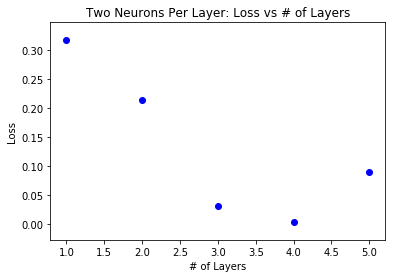

In [17]:
#figure of loss vs # of Layers
x_2 = [1,2,3,4,5]
y_2 = [scores_lay_one_two, scores_lay_two_two, scores_lay_three_two, scores_lay_four_two, scores_lay_five_two]

plt.scatter(x_2,y_2, c='blue');
plt.title('Two Neurons Per Layer: Loss vs # of Layers')
plt.xlabel('# of Layers')
plt.ylabel('Loss')


Optimal Number of Layers 4

# Part 1 Question 2: Three Neurons per Layer

One Layer

In [18]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [19]:
#One layer, three neurons per layer
model_lay_one_three = Sequential()

#hidden layers
model_lay_one_three.add(Dense(3, input_dim=2, activation='tanh')) 

#output layer
model_lay_one_three.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_one_three.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_one_three.fit(X, y, batch_size=2, epochs=400)
print(model_lay_one_three.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_one_three = model_lay_one_three.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 0.7352
Epoch 2/400
160/160 [==============================] - 0s 224us/step - loss: 0.7183
Epoch 3/400
160/160 [==============================] - 0s 224us/step - loss: 0.7051
Epoch 4/400
160/160 [==============================] - 0s 212us/step - loss: 0.6958
Epoch 5/400
160/160 [==============================] - 0s 224us/step - loss: 0.6884
Epoch 6/400
160/160 [==============================] - 0s 231us/step - loss: 0.6825
Epoch 7/400
160/160 [==============================] - 0s 231us/step - loss: 0.6775
Epoch 8/400
160/160 [==============================] - 0s 224us/step - loss: 0.6734
Epoch 9/400
160/160 [==============================] - 0s 224us/step - loss: 0.6698
Epoch 10/400
160/160 [==============================] - 0s 231us/step - loss: 0.6668
Epoch 11/400
160/160 [==============================] - 0s 231us/step - loss: 0.6636
Epoch 12/400
160/160 [==============================] - 0s 218us/step - loss

160/160 [==============================] - 0s 218us/step - loss: 0.3823
Epoch 98/400
160/160 [==============================] - 0s 224us/step - loss: 0.3799
Epoch 99/400
160/160 [==============================] - 0s 237us/step - loss: 0.3782
Epoch 100/400
160/160 [==============================] - 0s 231us/step - loss: 0.3765
Epoch 101/400
160/160 [==============================] - 0s 218us/step - loss: 0.3739
Epoch 102/400
160/160 [==============================] - 0s 224us/step - loss: 0.3719
Epoch 103/400
160/160 [==============================] - 0s 218us/step - loss: 0.3702
Epoch 104/400
160/160 [==============================] - 0s 231us/step - loss: 0.3680
Epoch 105/400
160/160 [==============================] - 0s 224us/step - loss: 0.3668
Epoch 106/400
160/160 [==============================] - 0s 224us/step - loss: 0.3648
Epoch 107/400
160/160 [==============================] - 0s 218us/step - loss: 0.3632
Epoch 108/400
160/160 [==============================] - 0s 218us/step

160/160 [==============================] - 0s 218us/step - loss: 0.3132
Epoch 193/400
160/160 [==============================] - 0s 224us/step - loss: 0.3127
Epoch 194/400
160/160 [==============================] - 0s 228us/step - loss: 0.3128
Epoch 195/400
160/160 [==============================] - 0s 243us/step - loss: 0.3128
Epoch 196/400
160/160 [==============================] - 0s 224us/step - loss: 0.3123
Epoch 197/400
160/160 [==============================] - 0s 212us/step - loss: 0.3121
Epoch 198/400
160/160 [==============================] - 0s 218us/step - loss: 0.3120
Epoch 199/400
160/160 [==============================] - 0s 212us/step - loss: 0.3120
Epoch 200/400
160/160 [==============================] - 0s 224us/step - loss: 0.3115
Epoch 201/400
160/160 [==============================] - 0s 231us/step - loss: 0.3119
Epoch 202/400
160/160 [==============================] - 0s 212us/step - loss: 0.3115
Epoch 203/400
160/160 [==============================] - 0s 218us/st

160/160 [==============================] - 0s 224us/step - loss: 0.3035
Epoch 288/400
160/160 [==============================] - 0s 218us/step - loss: 0.3030
Epoch 289/400
160/160 [==============================] - 0s 224us/step - loss: 0.3029
Epoch 290/400
160/160 [==============================] - 0s 218us/step - loss: 0.3033
Epoch 291/400
160/160 [==============================] - 0s 224us/step - loss: 0.3031
Epoch 292/400
160/160 [==============================] - 0s 224us/step - loss: 0.3032
Epoch 293/400
160/160 [==============================] - 0s 218us/step - loss: 0.3032
Epoch 294/400
160/160 [==============================] - 0s 243us/step - loss: 0.3030
Epoch 295/400
160/160 [==============================] - 0s 231us/step - loss: 0.3023
Epoch 296/400
160/160 [==============================] - 0s 218us/step - loss: 0.3027
Epoch 297/400
160/160 [==============================] - 0s 224us/step - loss: 0.3026
Epoch 298/400
160/160 [==============================] - 0s 218us/st

160/160 [==============================] - 0s 215us/step - loss: 0.2992
Epoch 383/400
160/160 [==============================] - 0s 218us/step - loss: 0.2989
Epoch 384/400
160/160 [==============================] - 0s 231us/step - loss: 0.2990
Epoch 385/400
160/160 [==============================] - 0s 218us/step - loss: 0.2986
Epoch 386/400
160/160 [==============================] - 0s 218us/step - loss: 0.2987
Epoch 387/400
160/160 [==============================] - 0s 218us/step - loss: 0.2988
Epoch 388/400
160/160 [==============================] - 0s 218us/step - loss: 0.2989
Epoch 389/400
160/160 [==============================] - 0s 212us/step - loss: 0.2984
Epoch 390/400
160/160 [==============================] - 0s 218us/step - loss: 0.2985
Epoch 391/400
160/160 [==============================] - 0s 212us/step - loss: 0.2985
Epoch 392/400
160/160 [==============================] - 0s 224us/step - loss: 0.2989
Epoch 393/400
160/160 [==============================] - 0s 218us/st

In [20]:
#One layer, three neurons per layer: loss
scores_lay_one_three, model_lay_one_three.metrics_names

(0.2959216445684433, ['loss'])

Two Layers

In [21]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [22]:
#Two layers, three neurons per layer
model_lay_two_three = Sequential()

#hidden layers
model_lay_two_three.add(Dense(3, input_dim=2, activation='tanh')) 
model_lay_two_three.add(Dense(3, activation='tanh'))

#output layer
model_lay_two_three.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_two_three.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_two_three.fit(X, y, batch_size=2, epochs=400)
print(model_lay_two_three.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_two_three = model_lay_two_three.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7536
Epoch 2/400
160/160 [==============================] - 0s 256us/step - loss: 0.7323
Epoch 3/400
160/160 [==============================] - 0s 259us/step - loss: 0.7182
Epoch 4/400
160/160 [==============================] - 0s 249us/step - loss: 0.7094
Epoch 5/400
160/160 [==============================] - 0s 249us/step - loss: 0.7033
Epoch 6/400
160/160 [==============================] - 0s 246us/step - loss: 0.6988
Epoch 7/400
160/160 [==============================] - 0s 249us/step - loss: 0.6953
Epoch 8/400
160/160 [==============================] - 0s 256us/step - loss: 0.6926
Epoch 9/400
160/160 [==============================] - 0s 249us/step - loss: 0.6901
Epoch 10/400
160/160 [==============================] - 0s 246us/step - loss: 0.6882
Epoch 11/400
160/160 [==============================] - 0s 237us/step - loss: 0.6864
Epoch 12/400
160/160 [==============================] - 0s 243us/step - loss

160/160 [==============================] - 0s 243us/step - loss: 0.4916
Epoch 98/400
160/160 [==============================] - 0s 243us/step - loss: 0.4903
Epoch 99/400
160/160 [==============================] - 0s 234us/step - loss: 0.4896
Epoch 100/400
160/160 [==============================] - 0s 231us/step - loss: 0.4890
Epoch 101/400
160/160 [==============================] - 0s 237us/step - loss: 0.4879
Epoch 102/400
160/160 [==============================] - 0s 234us/step - loss: 0.4875
Epoch 103/400
160/160 [==============================] - 0s 231us/step - loss: 0.4865
Epoch 104/400
160/160 [==============================] - 0s 231us/step - loss: 0.4857
Epoch 105/400
160/160 [==============================] - 0s 243us/step - loss: 0.4853
Epoch 106/400
160/160 [==============================] - 0s 237us/step - loss: 0.4852
Epoch 107/400
160/160 [==============================] - 0s 237us/step - loss: 0.4839
Epoch 108/400
160/160 [==============================] - 0s 237us/step

160/160 [==============================] - 0s 231us/step - loss: 0.4539
Epoch 193/400
160/160 [==============================] - 0s 231us/step - loss: 0.4543
Epoch 194/400
160/160 [==============================] - 0s 224us/step - loss: 0.4538
Epoch 195/400
160/160 [==============================] - 0s 224us/step - loss: 0.4522
Epoch 196/400
160/160 [==============================] - 0s 231us/step - loss: 0.4536
Epoch 197/400
160/160 [==============================] - 0s 218us/step - loss: 0.4528
Epoch 198/400
160/160 [==============================] - 0s 224us/step - loss: 0.4528
Epoch 199/400
160/160 [==============================] - 0s 231us/step - loss: 0.4531
Epoch 200/400
160/160 [==============================] - 0s 231us/step - loss: 0.4514
Epoch 201/400
160/160 [==============================] - 0s 218us/step - loss: 0.4522
Epoch 202/400
160/160 [==============================] - 0s 249us/step - loss: 0.4527
Epoch 203/400
160/160 [==============================] - 0s 243us/st

160/160 [==============================] - 0s 231us/step - loss: 0.4353
Epoch 288/400
160/160 [==============================] - 0s 231us/step - loss: 0.4349
Epoch 289/400
160/160 [==============================] - 0s 240us/step - loss: 0.4339
Epoch 290/400
160/160 [==============================] - 0s 237us/step - loss: 0.4335
Epoch 291/400
160/160 [==============================] - 0s 243us/step - loss: 0.4341
Epoch 292/400
160/160 [==============================] - 0s 231us/step - loss: 0.4330
Epoch 293/400
160/160 [==============================] - 0s 237us/step - loss: 0.4332
Epoch 294/400
160/160 [==============================] - 0s 256us/step - loss: 0.4337
Epoch 295/400
160/160 [==============================] - 0s 237us/step - loss: 0.4332
Epoch 296/400
160/160 [==============================] - 0s 231us/step - loss: 0.4325
Epoch 297/400
160/160 [==============================] - 0s 237us/step - loss: 0.4326
Epoch 298/400
160/160 [==============================] - 0s 234us/st

160/160 [==============================] - 0s 253us/step - loss: 0.4172
Epoch 383/400
160/160 [==============================] - 0s 231us/step - loss: 0.4189
Epoch 384/400
160/160 [==============================] - 0s 237us/step - loss: 0.4174
Epoch 385/400
160/160 [==============================] - 0s 237us/step - loss: 0.4163
Epoch 386/400
160/160 [==============================] - 0s 249us/step - loss: 0.4188
Epoch 387/400
160/160 [==============================] - 0s 249us/step - loss: 0.4167
Epoch 388/400
160/160 [==============================] - 0s 231us/step - loss: 0.4173
Epoch 389/400
160/160 [==============================] - 0s 240us/step - loss: 0.4175
Epoch 390/400
160/160 [==============================] - 0s 237us/step - loss: 0.4172
Epoch 391/400
160/160 [==============================] - 0s 231us/step - loss: 0.4163
Epoch 392/400
160/160 [==============================] - 0s 249us/step - loss: 0.4174
Epoch 393/400
160/160 [==============================] - 0s 231us/st

In [23]:
#Two layers, three neurons per layer: loss
scores_lay_two_three, model_lay_two_three.metrics_names

(0.41084097921848295, ['loss'])

Three Layers

In [24]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [25]:
#Three layers, three neurons per layer
model_lay_three_three = Sequential()

#hidden layers
model_lay_three_three.add(Dense(3, input_dim=2, activation='tanh')) 
model_lay_three_three.add(Dense(3, activation='tanh'))
model_lay_three_three.add(Dense(3, activation='tanh'))

#output layer
model_lay_three_three.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_three_three.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_three_three.fit(X, y, batch_size=2, epochs=400)
print(model_lay_three_three.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_three_three = model_lay_three_three.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7024
Epoch 2/400
160/160 [==============================] - 0s 262us/step - loss: 0.6996
Epoch 3/400
160/160 [==============================] - 0s 265us/step - loss: 0.6968
Epoch 4/400
160/160 [==============================] - 0s 268us/step - loss: 0.6948
Epoch 5/400
160/160 [==============================] - 0s 262us/step - loss: 0.6922
Epoch 6/400
160/160 [==============================] - 0s 274us/step - loss: 0.6898
Epoch 7/400
160/160 [==============================] - 0s 256us/step - loss: 0.6874
Epoch 8/400
160/160 [==============================] - 0s 249us/step - loss: 0.6839
Epoch 9/400
160/160 [==============================] - 0s 243us/step - loss: 0.6814
Epoch 10/400
160/160 [==============================] - 0s 262us/step - loss: 0.6776
Epoch 11/400
160/160 [==============================] - 0s 262us/step - loss: 0.6735
Epoch 12/400
160/160 [==============================] - 0s 268us/step - loss

160/160 [==============================] - 0s 249us/step - loss: 0.2366
Epoch 98/400
160/160 [==============================] - 0s 253us/step - loss: 0.2357
Epoch 99/400
160/160 [==============================] - 0s 243us/step - loss: 0.2339
Epoch 100/400
160/160 [==============================] - 0s 243us/step - loss: 0.2306
Epoch 101/400
160/160 [==============================] - 0s 249us/step - loss: 0.2331
Epoch 102/400
160/160 [==============================] - 0s 256us/step - loss: 0.2335
Epoch 103/400
160/160 [==============================] - 0s 243us/step - loss: 0.2317
Epoch 104/400
160/160 [==============================] - 0s 243us/step - loss: 0.2281
Epoch 105/400
160/160 [==============================] - 0s 243us/step - loss: 0.2315
Epoch 106/400
160/160 [==============================] - 0s 249us/step - loss: 0.2246
Epoch 107/400
160/160 [==============================] - 0s 243us/step - loss: 0.2324
Epoch 108/400
160/160 [==============================] - 0s 249us/step

160/160 [==============================] - 0s 243us/step - loss: 0.2075
Epoch 193/400
160/160 [==============================] - 0s 249us/step - loss: 0.2102
Epoch 194/400
160/160 [==============================] - 0s 243us/step - loss: 0.2119
Epoch 195/400
160/160 [==============================] - 0s 256us/step - loss: 0.2093
Epoch 196/400
160/160 [==============================] - 0s 268us/step - loss: 0.2121
Epoch 197/400
160/160 [==============================] - 0s 249us/step - loss: 0.2105
Epoch 198/400
160/160 [==============================] - 0s 243us/step - loss: 0.2114
Epoch 199/400
160/160 [==============================] - 0s 243us/step - loss: 0.2098
Epoch 200/400
160/160 [==============================] - 0s 249us/step - loss: 0.2171
Epoch 201/400
160/160 [==============================] - 0s 262us/step - loss: 0.2110
Epoch 202/400
160/160 [==============================] - 0s 249us/step - loss: 0.2146
Epoch 203/400
160/160 [==============================] - 0s 243us/st

160/160 [==============================] - 0s 243us/step - loss: 0.1991
Epoch 288/400
160/160 [==============================] - 0s 243us/step - loss: 0.2043
Epoch 289/400
160/160 [==============================] - 0s 249us/step - loss: 0.2152
Epoch 290/400
160/160 [==============================] - 0s 243us/step - loss: 0.2047
Epoch 291/400
160/160 [==============================] - 0s 243us/step - loss: 0.2069
Epoch 292/400
160/160 [==============================] - 0s 243us/step - loss: 0.2021
Epoch 293/400
160/160 [==============================] - 0s 243us/step - loss: 0.2079
Epoch 294/400
160/160 [==============================] - 0s 237us/step - loss: 0.2072
Epoch 295/400
160/160 [==============================] - 0s 246us/step - loss: 0.2054
Epoch 296/400
160/160 [==============================] - 0s 262us/step - loss: 0.1992
Epoch 297/400
160/160 [==============================] - 0s 256us/step - loss: 0.2054
Epoch 298/400
160/160 [==============================] - 0s 252us/st

160/160 [==============================] - 0s 243us/step - loss: 0.2084
Epoch 383/400
160/160 [==============================] - 0s 237us/step - loss: 0.2140
Epoch 384/400
160/160 [==============================] - 0s 246us/step - loss: 0.1965
Epoch 385/400
160/160 [==============================] - 0s 249us/step - loss: 0.2000
Epoch 386/400
160/160 [==============================] - 0s 259us/step - loss: 0.1996
Epoch 387/400
160/160 [==============================] - 0s 277us/step - loss: 0.2051
Epoch 388/400
160/160 [==============================] - 0s 274us/step - loss: 0.1987
Epoch 389/400
160/160 [==============================] - 0s 280us/step - loss: 0.1978
Epoch 390/400
160/160 [==============================] - 0s 259us/step - loss: 0.2048
Epoch 391/400
160/160 [==============================] - 0s 243us/step - loss: 0.2109
Epoch 392/400
160/160 [==============================] - 0s 256us/step - loss: 0.2125
Epoch 393/400
160/160 [==============================] - 0s 262us/st

In [26]:
#Three layers, three neurons per layer: loss
scores_lay_three_three, model_lay_three_three.metrics_names

(0.19233208596706391, ['loss'])

Four Layers

In [27]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [28]:
#Four layers, three neurons per layer
model_lay_four_three = Sequential()

#hidden layers
model_lay_four_three.add(Dense(3, input_dim=2, activation='tanh')) 
model_lay_four_three.add(Dense(3, activation='tanh'))
model_lay_four_three.add(Dense(3, activation='tanh'))
model_lay_four_three.add(Dense(3, activation='tanh'))

#output layer
model_lay_four_three.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_four_three.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_four_three.fit(X, y, batch_size=2, epochs=400)
print(model_lay_four_three.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_four_three = model_lay_four_three.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2/400
160/160 [==============================] - 0s 262us/step - loss: 0.6931
Epoch 3/400
160/160 [==============================] - 0s 249us/step - loss: 0.6912
Epoch 4/400
160/160 [==============================] - 0s 256us/step - loss: 0.6893
Epoch 5/400
160/160 [==============================] - 0s 293us/step - loss: 0.6875
Epoch 6/400
160/160 [==============================] - 0s 274us/step - loss: 0.6855
Epoch 7/400
160/160 [==============================] - 0s 256us/step - loss: 0.6831
Epoch 8/400
160/160 [==============================] - 0s 262us/step - loss: 0.6805
Epoch 9/400
160/160 [==============================] - 0s 249us/step - loss: 0.6782
Epoch 10/400
160/160 [==============================] - 0s 252us/step - loss: 0.6753
Epoch 11/400
160/160 [==============================] - 0s 256us/step - loss: 0.6719
Epoch 12/400
160/160 [==============================] - 0s 262us/step - loss

160/160 [==============================] - 0s 262us/step - loss: 0.3022
Epoch 98/400
160/160 [==============================] - 0s 268us/step - loss: 0.2938
Epoch 99/400
160/160 [==============================] - 0s 274us/step - loss: 0.2788
Epoch 100/400
160/160 [==============================] - 0s 262us/step - loss: 0.2659
Epoch 101/400
160/160 [==============================] - 0s 262us/step - loss: 0.2625
Epoch 102/400
160/160 [==============================] - 0s 299us/step - loss: 0.2696
Epoch 103/400
160/160 [==============================] - 0s 293us/step - loss: 0.2561
Epoch 104/400
160/160 [==============================] - 0s 274us/step - loss: 0.2323
Epoch 105/400
160/160 [==============================] - 0s 268us/step - loss: 0.2447
Epoch 106/400
160/160 [==============================] - 0s 268us/step - loss: 0.2411
Epoch 107/400
160/160 [==============================] - 0s 256us/step - loss: 0.2434
Epoch 108/400
160/160 [==============================] - 0s 262us/step

160/160 [==============================] - 0s 281us/step - loss: 0.1552
Epoch 193/400
160/160 [==============================] - 0s 274us/step - loss: 0.1727
Epoch 194/400
160/160 [==============================] - 0s 274us/step - loss: 0.1413
Epoch 195/400
160/160 [==============================] - 0s 249us/step - loss: 0.1548
Epoch 196/400
160/160 [==============================] - 0s 256us/step - loss: 0.1608
Epoch 197/400
160/160 [==============================] - 0s 249us/step - loss: 0.1393
Epoch 198/400
160/160 [==============================] - 0s 256us/step - loss: 0.1671
Epoch 199/400
160/160 [==============================] - 0s 249us/step - loss: 0.1473
Epoch 200/400
160/160 [==============================] - 0s 246us/step - loss: 0.1212
Epoch 201/400
160/160 [==============================] - 0s 256us/step - loss: 0.1316
Epoch 202/400
160/160 [==============================] - 0s 256us/step - loss: 0.1297
Epoch 203/400
160/160 [==============================] - 0s 252us/st

160/160 [==============================] - 0s 274us/step - loss: 0.0839
Epoch 288/400
160/160 [==============================] - 0s 268us/step - loss: 0.0956
Epoch 289/400
160/160 [==============================] - 0s 262us/step - loss: 0.0864
Epoch 290/400
160/160 [==============================] - 0s 262us/step - loss: 0.0835
Epoch 291/400
160/160 [==============================] - 0s 268us/step - loss: 0.0934
Epoch 292/400
160/160 [==============================] - 0s 274us/step - loss: 0.1042
Epoch 293/400
160/160 [==============================] - 0s 287us/step - loss: 0.0850
Epoch 294/400
160/160 [==============================] - 0s 262us/step - loss: 0.0873
Epoch 295/400
160/160 [==============================] - 0s 262us/step - loss: 0.0926
Epoch 296/400
160/160 [==============================] - 0s 256us/step - loss: 0.0728
Epoch 297/400
160/160 [==============================] - 0s 268us/step - loss: 0.0889
Epoch 298/400
160/160 [==============================] - 0s 268us/st

160/160 [==============================] - 0s 256us/step - loss: 0.0462
Epoch 383/400
160/160 [==============================] - 0s 268us/step - loss: 0.0681
Epoch 384/400
160/160 [==============================] - 0s 268us/step - loss: 0.0702
Epoch 385/400
160/160 [==============================] - 0s 262us/step - loss: 0.0925
Epoch 386/400
160/160 [==============================] - 0s 252us/step - loss: 0.0563
Epoch 387/400
160/160 [==============================] - 0s 256us/step - loss: 0.0658
Epoch 388/400
160/160 [==============================] - 0s 249us/step - loss: 0.0551
Epoch 389/400
160/160 [==============================] - 0s 256us/step - loss: 0.0859
Epoch 390/400
160/160 [==============================] - 0s 256us/step - loss: 0.0669
Epoch 391/400
160/160 [==============================] - 0s 249us/step - loss: 0.0520
Epoch 392/400
160/160 [==============================] - 0s 256us/step - loss: 0.0925
Epoch 393/400
160/160 [==============================] - 0s 256us/st

In [29]:
#Four layers, three neurons per layer: loss
scores_lay_four_three, model_lay_four_three.metrics_names

(0.0724665665999055, ['loss'])

Five Layers

In [30]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [31]:
#Five layers, three neurons per layer
model_lay_five_three = Sequential()

#hidden layers
model_lay_five_three.add(Dense(3, input_dim=2, activation='tanh')) 
model_lay_five_three.add(Dense(3, activation='tanh'))
model_lay_five_three.add(Dense(3, activation='tanh'))
model_lay_five_three.add(Dense(3, activation='tanh'))
model_lay_five_three.add(Dense(3, activation='tanh'))

#output layer
model_lay_five_three.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_five_three.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_five_three.fit(X, y, batch_size=2, epochs=400)
print(model_lay_five_three.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_five_three = model_lay_five_three.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 2/400
160/160 [==============================] - 0s 305us/step - loss: 0.6947
Epoch 3/400
160/160 [==============================] - 0s 293us/step - loss: 0.6946
Epoch 4/400
160/160 [==============================] - 0s 268us/step - loss: 0.6936
Epoch 5/400
160/160 [==============================] - 0s 281us/step - loss: 0.6933
Epoch 6/400
160/160 [==============================] - 0s 281us/step - loss: 0.6925
Epoch 7/400
160/160 [==============================] - 0s 312us/step - loss: 0.6918
Epoch 8/400
160/160 [==============================] - 0s 349us/step - loss: 0.6902
Epoch 9/400
160/160 [==============================] - 0s 349us/step - loss: 0.6895
Epoch 10/400
160/160 [==============================] - 0s 293us/step - loss: 0.6875
Epoch 11/400
160/160 [==============================] - 0s 312us/step - loss: 0.6858
Epoch 12/400
160/160 [==============================] - 0s 293us/step - loss

160/160 [==============================] - 0s 268us/step - loss: 0.1549
Epoch 98/400
160/160 [==============================] - 0s 265us/step - loss: 0.1297
Epoch 99/400
160/160 [==============================] - 0s 280us/step - loss: 0.1151
Epoch 100/400
160/160 [==============================] - 0s 281us/step - loss: 0.1303
Epoch 101/400
160/160 [==============================] - 0s 268us/step - loss: 0.1040
Epoch 102/400
160/160 [==============================] - 0s 268us/step - loss: 0.1234
Epoch 103/400
160/160 [==============================] - 0s 262us/step - loss: 0.1191
Epoch 104/400
160/160 [==============================] - 0s 268us/step - loss: 0.1076
Epoch 105/400
160/160 [==============================] - 0s 268us/step - loss: 0.1121
Epoch 106/400
160/160 [==============================] - 0s 262us/step - loss: 0.1782
Epoch 107/400
160/160 [==============================] - 0s 262us/step - loss: 0.0958
Epoch 108/400
160/160 [==============================] - 0s 268us/step

160/160 [==============================] - 0s 268us/step - loss: 0.0635
Epoch 193/400
160/160 [==============================] - 0s 287us/step - loss: 0.0713
Epoch 194/400
160/160 [==============================] - 0s 262us/step - loss: 0.0534
Epoch 195/400
160/160 [==============================] - 0s 262us/step - loss: 0.0575
Epoch 196/400
160/160 [==============================] - 0s 262us/step - loss: 0.0661
Epoch 197/400
160/160 [==============================] - 0s 268us/step - loss: 0.0698
Epoch 198/400
160/160 [==============================] - 0s 293us/step - loss: 0.0834
Epoch 199/400
160/160 [==============================] - 0s 268us/step - loss: 0.0661
Epoch 200/400
160/160 [==============================] - 0s 274us/step - loss: 0.0668
Epoch 201/400
160/160 [==============================] - 0s 268us/step - loss: 0.0691
Epoch 202/400
160/160 [==============================] - 0s 274us/step - loss: 0.0969
Epoch 203/400
160/160 [==============================] - 0s 274us/st

160/160 [==============================] - 0s 268us/step - loss: 0.0570
Epoch 288/400
160/160 [==============================] - 0s 262us/step - loss: 0.0422
Epoch 289/400
160/160 [==============================] - 0s 259us/step - loss: 0.0434
Epoch 290/400
160/160 [==============================] - 0s 268us/step - loss: 0.0554
Epoch 291/400
160/160 [==============================] - 0s 265us/step - loss: 0.0292
Epoch 292/400
160/160 [==============================] - 0s 262us/step - loss: 0.0700
Epoch 293/400
160/160 [==============================] - 0s 268us/step - loss: 0.0459
Epoch 294/400
160/160 [==============================] - 0s 265us/step - loss: 0.0327
Epoch 295/400
160/160 [==============================] - 0s 268us/step - loss: 0.0479
Epoch 296/400
160/160 [==============================] - 0s 265us/step - loss: 0.0397
Epoch 297/400
160/160 [==============================] - 0s 274us/step - loss: 0.0577
Epoch 298/400
160/160 [==============================] - 0s 262us/st

160/160 [==============================] - 0s 252us/step - loss: 0.0198
Epoch 383/400
160/160 [==============================] - 0s 256us/step - loss: 0.0215
Epoch 384/400
160/160 [==============================] - 0s 262us/step - loss: 0.0216
Epoch 385/400
160/160 [==============================] - 0s 262us/step - loss: 0.0623
Epoch 386/400
160/160 [==============================] - 0s 268us/step - loss: 0.0790
Epoch 387/400
160/160 [==============================] - 0s 262us/step - loss: 0.0274
Epoch 388/400
160/160 [==============================] - 0s 268us/step - loss: 0.0335
Epoch 389/400
160/160 [==============================] - 0s 274us/step - loss: 0.0204
Epoch 390/400
160/160 [==============================] - 0s 274us/step - loss: 0.0421
Epoch 391/400
160/160 [==============================] - 0s 268us/step - loss: 0.0672
Epoch 392/400
160/160 [==============================] - 0s 268us/step - loss: 0.0317
Epoch 393/400
160/160 [==============================] - 0s 274us/st

In [32]:
#Five layers, three neurons per layer: loss
scores_lay_five_three, model_lay_five_three.metrics_names

(0.011262303916737437, ['loss'])

Figure of Loss

Text(0, 0.5, 'Loss')

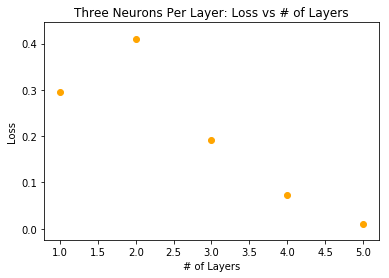

In [33]:
#figure of loss vs # of Layers
x_3 = [1,2,3,4,5]
y_3 = [scores_lay_one_three, scores_lay_two_three, scores_lay_three_three, scores_lay_four_three, scores_lay_five_three]

plt.scatter(x_3,y_3, c='orange');
plt.title('Three Neurons Per Layer: Loss vs # of Layers')
plt.xlabel('# of Layers')
plt.ylabel('Loss')

# Part 1 Question 2: Four Neurons per Layer

One Layer

In [34]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [35]:
#One layer, four neurons per layer
model_lay_one_four = Sequential()

#hidden layers
model_lay_one_four.add(Dense(4, input_dim=2, activation='tanh')) 

#output layer
model_lay_one_four.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_one_four.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_one_four.fit(X, y, batch_size=2, epochs=400)
print(model_lay_one_four.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_one_four = model_lay_one_four.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6965
Epoch 2/400
160/160 [==============================] - 0s 240us/step - loss: 0.6956
Epoch 3/400
160/160 [==============================] - 0s 231us/step - loss: 0.6951
Epoch 4/400
160/160 [==============================] - 0s 234us/step - loss: 0.6943
Epoch 5/400
160/160 [==============================] - 0s 237us/step - loss: 0.6937
Epoch 6/400
160/160 [==============================] - 0s 231us/step - loss: 0.6930
Epoch 7/400
160/160 [==============================] - 0s 240us/step - loss: 0.6923
Epoch 8/400
160/160 [==============================] - 0s 243us/step - loss: 0.6916
Epoch 9/400
160/160 [==============================] - 0s 237us/step - loss: 0.6912
Epoch 10/400
160/160 [==============================] - 0s 252us/step - loss: 0.6905
Epoch 11/400
160/160 [==============================] - 0s 237us/step - loss: 0.6899
Epoch 12/400
160/160 [==============================] - 0s 237us/step - loss

160/160 [==============================] - 0s 231us/step - loss: 0.3811
Epoch 98/400
160/160 [==============================] - 0s 228us/step - loss: 0.3775
Epoch 99/400
160/160 [==============================] - 0s 231us/step - loss: 0.3740
Epoch 100/400
160/160 [==============================] - 0s 234us/step - loss: 0.3702
Epoch 101/400
160/160 [==============================] - 0s 231us/step - loss: 0.3662
Epoch 102/400
160/160 [==============================] - 0s 237us/step - loss: 0.3628
Epoch 103/400
160/160 [==============================] - 0s 231us/step - loss: 0.3594
Epoch 104/400
160/160 [==============================] - 0s 231us/step - loss: 0.3562
Epoch 105/400
160/160 [==============================] - 0s 237us/step - loss: 0.3528
Epoch 106/400
160/160 [==============================] - 0s 231us/step - loss: 0.3492
Epoch 107/400
160/160 [==============================] - 0s 231us/step - loss: 0.3461
Epoch 108/400
160/160 [==============================] - 0s 231us/step

160/160 [==============================] - 0s 249us/step - loss: 0.2018
Epoch 193/400
160/160 [==============================] - 0s 231us/step - loss: 0.2014
Epoch 194/400
160/160 [==============================] - 0s 237us/step - loss: 0.2005
Epoch 195/400
160/160 [==============================] - 0s 243us/step - loss: 0.2000
Epoch 196/400
160/160 [==============================] - 0s 249us/step - loss: 0.1991
Epoch 197/400
160/160 [==============================] - 0s 249us/step - loss: 0.1983
Epoch 198/400
160/160 [==============================] - 0s 237us/step - loss: 0.1974
Epoch 199/400
160/160 [==============================] - 0s 243us/step - loss: 0.1967
Epoch 200/400
160/160 [==============================] - 0s 246us/step - loss: 0.1963
Epoch 201/400
160/160 [==============================] - 0s 237us/step - loss: 0.1953
Epoch 202/400
160/160 [==============================] - 0s 231us/step - loss: 0.1947
Epoch 203/400
160/160 [==============================] - 0s 237us/st

160/160 [==============================] - 0s 237us/step - loss: 0.1574
Epoch 288/400
160/160 [==============================] - 0s 243us/step - loss: 0.1578
Epoch 289/400
160/160 [==============================] - 0s 249us/step - loss: 0.1573
Epoch 290/400
160/160 [==============================] - 0s 243us/step - loss: 0.1573
Epoch 291/400
160/160 [==============================] - 0s 249us/step - loss: 0.1564
Epoch 292/400
160/160 [==============================] - 0s 231us/step - loss: 0.1567
Epoch 293/400
160/160 [==============================] - 0s 237us/step - loss: 0.1563
Epoch 294/400
160/160 [==============================] - 0s 249us/step - loss: 0.1561
Epoch 295/400
160/160 [==============================] - 0s 237us/step - loss: 0.1558
Epoch 296/400
160/160 [==============================] - 0s 249us/step - loss: 0.1556
Epoch 297/400
160/160 [==============================] - 0s 237us/step - loss: 0.1553
Epoch 298/400
160/160 [==============================] - 0s 237us/st

160/160 [==============================] - 0s 262us/step - loss: 0.1387
Epoch 383/400
160/160 [==============================] - 0s 262us/step - loss: 0.1387
Epoch 384/400
160/160 [==============================] - 0s 262us/step - loss: 0.1387
Epoch 385/400
160/160 [==============================] - 0s 243us/step - loss: 0.1384
Epoch 386/400
160/160 [==============================] - 0s 234us/step - loss: 0.1383
Epoch 387/400
160/160 [==============================] - 0s 243us/step - loss: 0.1379
Epoch 388/400
160/160 [==============================] - 0s 249us/step - loss: 0.1380
Epoch 389/400
160/160 [==============================] - 0s 243us/step - loss: 0.1380
Epoch 390/400
160/160 [==============================] - 0s 237us/step - loss: 0.1377
Epoch 391/400
160/160 [==============================] - 0s 243us/step - loss: 0.1376
Epoch 392/400
160/160 [==============================] - 0s 243us/step - loss: 0.1374
Epoch 393/400
160/160 [==============================] - 0s 243us/st

In [36]:
#One layer, four neurons per layer: loss
scores_lay_one_four, model_lay_one_four.metrics_names

(0.13428999334573746, ['loss'])

Two Layers

In [37]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [38]:
#Two layers, four neurons per layer
model_lay_two_four = Sequential()

#hidden layers
model_lay_two_four.add(Dense(4, input_dim=2, activation='tanh')) 
model_lay_two_four.add(Dense(4, activation='tanh'))

#output layer
model_lay_two_four.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_two_four.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_two_four.fit(X, y, batch_size=2, epochs=400)
print(model_lay_two_four.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_two_four = model_lay_two_four.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 2/400
160/160 [==============================] - 0s 259us/step - loss: 0.6955
Epoch 3/400
160/160 [==============================] - 0s 256us/step - loss: 0.6936
Epoch 4/400
160/160 [==============================] - 0s 262us/step - loss: 0.6916
Epoch 5/400
160/160 [==============================] - 0s 256us/step - loss: 0.6895
Epoch 6/400
160/160 [==============================] - 0s 265us/step - loss: 0.6873
Epoch 7/400
160/160 [==============================] - 0s 268us/step - loss: 0.6852
Epoch 8/400
160/160 [==============================] - 0s 268us/step - loss: 0.6833
Epoch 9/400
160/160 [==============================] - 0s 256us/step - loss: 0.6809
Epoch 10/400
160/160 [==============================] - 0s 274us/step - loss: 0.6780
Epoch 11/400
160/160 [==============================] - 0s 281us/step - loss: 0.6761
Epoch 12/400
160/160 [==============================] - 0s 280us/step - loss

160/160 [==============================] - 0s 249us/step - loss: 0.1853
Epoch 98/400
160/160 [==============================] - 0s 246us/step - loss: 0.1812
Epoch 99/400
160/160 [==============================] - 0s 280us/step - loss: 0.1788
Epoch 100/400
160/160 [==============================] - 0s 274us/step - loss: 0.1758
Epoch 101/400
160/160 [==============================] - 0s 249us/step - loss: 0.1723
Epoch 102/400
160/160 [==============================] - 0s 256us/step - loss: 0.1706
Epoch 103/400
160/160 [==============================] - 0s 274us/step - loss: 0.1679
Epoch 104/400
160/160 [==============================] - 0s 256us/step - loss: 0.1650
Epoch 105/400
160/160 [==============================] - 0s 268us/step - loss: 0.1623
Epoch 106/400
160/160 [==============================] - 0s 268us/step - loss: 0.1598
Epoch 107/400
160/160 [==============================] - 0s 249us/step - loss: 0.1568
Epoch 108/400
160/160 [==============================] - 0s 256us/step

160/160 [==============================] - 0s 237us/step - loss: 0.0738
Epoch 193/400
160/160 [==============================] - 0s 243us/step - loss: 0.0736
Epoch 194/400
160/160 [==============================] - 0s 249us/step - loss: 0.0744
Epoch 195/400
160/160 [==============================] - 0s 246us/step - loss: 0.0723
Epoch 196/400
160/160 [==============================] - 0s 256us/step - loss: 0.0728
Epoch 197/400
160/160 [==============================] - 0s 246us/step - loss: 0.0717
Epoch 198/400
160/160 [==============================] - 0s 243us/step - loss: 0.0725
Epoch 199/400
160/160 [==============================] - 0s 249us/step - loss: 0.0713
Epoch 200/400
160/160 [==============================] - 0s 246us/step - loss: 0.0712
Epoch 201/400
160/160 [==============================] - 0s 256us/step - loss: 0.0694
Epoch 202/400
160/160 [==============================] - 0s 256us/step - loss: 0.0710
Epoch 203/400
160/160 [==============================] - 0s 249us/st

160/160 [==============================] - 0s 249us/step - loss: 0.0513
Epoch 288/400
160/160 [==============================] - 0s 243us/step - loss: 0.0507
Epoch 289/400
160/160 [==============================] - 0s 243us/step - loss: 0.0517
Epoch 290/400
160/160 [==============================] - 0s 243us/step - loss: 0.0508
Epoch 291/400
160/160 [==============================] - 0s 243us/step - loss: 0.0508
Epoch 292/400
160/160 [==============================] - 0s 243us/step - loss: 0.0490
Epoch 293/400
160/160 [==============================] - 0s 249us/step - loss: 0.0507
Epoch 294/400
160/160 [==============================] - 0s 249us/step - loss: 0.0509
Epoch 295/400
160/160 [==============================] - 0s 249us/step - loss: 0.0495
Epoch 296/400
160/160 [==============================] - 0s 262us/step - loss: 0.0514
Epoch 297/400
160/160 [==============================] - 0s 262us/step - loss: 0.0497
Epoch 298/400
160/160 [==============================] - 0s 256us/st

160/160 [==============================] - 0s 243us/step - loss: 0.0401
Epoch 383/400
160/160 [==============================] - 0s 243us/step - loss: 0.0413
Epoch 384/400
160/160 [==============================] - 0s 249us/step - loss: 0.0410
Epoch 385/400
160/160 [==============================] - 0s 243us/step - loss: 0.0416
Epoch 386/400
160/160 [==============================] - 0s 243us/step - loss: 0.0412
Epoch 387/400
160/160 [==============================] - 0s 243us/step - loss: 0.0411
Epoch 388/400
160/160 [==============================] - 0s 249us/step - loss: 0.0417
Epoch 389/400
160/160 [==============================] - 0s 237us/step - loss: 0.0392
Epoch 390/400
160/160 [==============================] - 0s 240us/step - loss: 0.0411
Epoch 391/400
160/160 [==============================] - 0s 243us/step - loss: 0.0409
Epoch 392/400
160/160 [==============================] - 0s 249us/step - loss: 0.0413
Epoch 393/400
160/160 [==============================] - 0s 246us/st

In [39]:
#Two layers, four neurons per layer: loss
scores_lay_two_four, model_lay_two_four.metrics_names

(0.03355945982038975, ['loss'])

Three Layers

In [40]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [41]:
#Three layers, four neurons per layer
model_lay_three_four = Sequential()

#hidden layers
model_lay_three_four.add(Dense(4, input_dim=2, activation='tanh')) 
model_lay_three_four.add(Dense(4, activation='tanh'))
model_lay_three_four.add(Dense(4, activation='tanh'))

#output layer
model_lay_three_four.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_three_four.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_three_four.fit(X, y, batch_size=2, epochs=400)
print(model_lay_three_four.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_three_four = model_lay_three_four.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6973
Epoch 2/400
160/160 [==============================] - 0s 268us/step - loss: 0.6967
Epoch 3/400
160/160 [==============================] - 0s 268us/step - loss: 0.6959
Epoch 4/400
160/160 [==============================] - 0s 293us/step - loss: 0.6952
Epoch 5/400
160/160 [==============================] - 0s 299us/step - loss: 0.6937
Epoch 6/400
160/160 [==============================] - 0s 277us/step - loss: 0.6937
Epoch 7/400
160/160 [==============================] - 0s 274us/step - loss: 0.6932
Epoch 8/400
160/160 [==============================] - 0s 281us/step - loss: 0.6922
Epoch 9/400
160/160 [==============================] - 0s 315us/step - loss: 0.6915
Epoch 10/400
160/160 [==============================] - 0s 277us/step - loss: 0.6896
Epoch 11/400
160/160 [==============================] - 0s 271us/step - loss: 0.6893
Epoch 12/400
160/160 [==============================] - 0s 277us/step - loss

160/160 [==============================] - 0s 249us/step - loss: 0.1249
Epoch 98/400
160/160 [==============================] - 0s 256us/step - loss: 0.1241
Epoch 99/400
160/160 [==============================] - 0s 293us/step - loss: 0.1173
Epoch 100/400
160/160 [==============================] - 0s 287us/step - loss: 0.1155
Epoch 101/400
160/160 [==============================] - 0s 249us/step - loss: 0.1125
Epoch 102/400
160/160 [==============================] - 0s 256us/step - loss: 0.1040
Epoch 103/400
160/160 [==============================] - 0s 256us/step - loss: 0.0987
Epoch 104/400
160/160 [==============================] - 0s 256us/step - loss: 0.0991
Epoch 105/400
160/160 [==============================] - 0s 256us/step - loss: 0.0934
Epoch 106/400
160/160 [==============================] - 0s 262us/step - loss: 0.0931
Epoch 107/400
160/160 [==============================] - 0s 256us/step - loss: 0.0883
Epoch 108/400
160/160 [==============================] - 0s 256us/step

160/160 [==============================] - 0s 262us/step - loss: 0.0332
Epoch 193/400
160/160 [==============================] - 0s 268us/step - loss: 0.0286
Epoch 194/400
160/160 [==============================] - 0s 268us/step - loss: 0.0331
Epoch 195/400
160/160 [==============================] - 0s 252us/step - loss: 0.0349
Epoch 196/400
160/160 [==============================] - 0s 262us/step - loss: 0.0359
Epoch 197/400
160/160 [==============================] - 0s 259us/step - loss: 0.0316
Epoch 198/400
160/160 [==============================] - 0s 256us/step - loss: 0.0405
Epoch 199/400
160/160 [==============================] - 0s 268us/step - loss: 0.0322
Epoch 200/400
160/160 [==============================] - 0s 259us/step - loss: 0.0356
Epoch 201/400
160/160 [==============================] - 0s 256us/step - loss: 0.0235
Epoch 202/400
160/160 [==============================] - 0s 256us/step - loss: 0.0340
Epoch 203/400
160/160 [==============================] - 0s 249us/st

160/160 [==============================] - 0s 312us/step - loss: 0.0239
Epoch 288/400
160/160 [==============================] - 0s 274us/step - loss: 0.0305
Epoch 289/400
160/160 [==============================] - 0s 262us/step - loss: 0.0222
Epoch 290/400
160/160 [==============================] - 0s 268us/step - loss: 0.0309
Epoch 291/400
160/160 [==============================] - 0s 262us/step - loss: 0.0252
Epoch 292/400
160/160 [==============================] - 0s 252us/step - loss: 0.0321
Epoch 293/400
160/160 [==============================] - 0s 262us/step - loss: 0.0340
Epoch 294/400
160/160 [==============================] - 0s 262us/step - loss: 0.0222
Epoch 295/400
160/160 [==============================] - 0s 256us/step - loss: 0.0425
Epoch 296/400
160/160 [==============================] - 0s 262us/step - loss: 0.0288
Epoch 297/400
160/160 [==============================] - 0s 262us/step - loss: 0.0365
Epoch 298/400
160/160 [==============================] - 0s 256us/st

160/160 [==============================] - 0s 340us/step - loss: 0.0229
Epoch 383/400
160/160 [==============================] - 0s 287us/step - loss: 0.0308
Epoch 384/400
160/160 [==============================] - 0s 268us/step - loss: 0.0242
Epoch 385/400
160/160 [==============================] - 0s 259us/step - loss: 0.0306
Epoch 386/400
160/160 [==============================] - 0s 274us/step - loss: 0.0217
Epoch 387/400
160/160 [==============================] - 0s 262us/step - loss: 0.0257
Epoch 388/400
160/160 [==============================] - 0s 256us/step - loss: 0.0215
Epoch 389/400
160/160 [==============================] - 0s 256us/step - loss: 0.0236
Epoch 390/400
160/160 [==============================] - 0s 259us/step - loss: 0.0349
Epoch 391/400
160/160 [==============================] - 0s 256us/step - loss: 0.0262
Epoch 392/400
160/160 [==============================] - 0s 287us/step - loss: 0.0296
Epoch 393/400
160/160 [==============================] - 0s 268us/st

In [42]:
#Three layers, four neurons per layer: loss
scores_lay_three_four, model_lay_three_four.metrics_names

(0.01588033838197589, ['loss'])

Four Layers

In [43]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [44]:
#Four layers, four neurons per layer
model_lay_four_four = Sequential()

#hidden layers
model_lay_four_four.add(Dense(4, input_dim=2, activation='tanh')) 
model_lay_four_four.add(Dense(4, activation='tanh'))
model_lay_four_four.add(Dense(4, activation='tanh'))
model_lay_four_four.add(Dense(4, activation='tanh'))

#output layer
model_lay_four_four.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_four_four.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_four_four.fit(X, y, batch_size=2, epochs=400)
print(model_lay_four_four.predict_proba(X).reshape(4*n))

#evauluate the model
scores_lay_four_four = model_lay_four_four.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6946
Epoch 2/400
160/160 [==============================] - 0s 281us/step - loss: 0.6939
Epoch 3/400
160/160 [==============================] - 0s 281us/step - loss: 0.6931
Epoch 4/400
160/160 [==============================] - 0s 277us/step - loss: 0.6924
Epoch 5/400
160/160 [==============================] - 0s 281us/step - loss: 0.6920
Epoch 6/400
160/160 [==============================] - 0s 284us/step - loss: 0.6911
Epoch 7/400
160/160 [==============================] - 0s 274us/step - loss: 0.6903
Epoch 8/400
160/160 [==============================] - 0s 271us/step - loss: 0.6889
Epoch 9/400
160/160 [==============================] - 0s 274us/step - loss: 0.6883
Epoch 10/400
160/160 [==============================] - 0s 262us/step - loss: 0.6868
Epoch 11/400
160/160 [==============================] - 0s 274us/step - loss: 0.6857
Epoch 12/400
160/160 [==============================] - 0s 280us/step - loss

160/160 [==============================] - 0s 274us/step - loss: 0.2289
Epoch 98/400
160/160 [==============================] - 0s 274us/step - loss: 0.2319
Epoch 99/400
160/160 [==============================] - 0s 262us/step - loss: 0.2183
Epoch 100/400
160/160 [==============================] - 0s 268us/step - loss: 0.2210
Epoch 101/400
160/160 [==============================] - 0s 274us/step - loss: 0.2181
Epoch 102/400
160/160 [==============================] - 0s 274us/step - loss: 0.1976
Epoch 103/400
160/160 [==============================] - 0s 274us/step - loss: 0.2209
Epoch 104/400
160/160 [==============================] - 0s 271us/step - loss: 0.2131
Epoch 105/400
160/160 [==============================] - 0s 262us/step - loss: 0.1920
Epoch 106/400
160/160 [==============================] - 0s 281us/step - loss: 0.1990
Epoch 107/400
160/160 [==============================] - 0s 305us/step - loss: 0.2040
Epoch 108/400
160/160 [==============================] - 0s 277us/step

160/160 [==============================] - 0s 274us/step - loss: 0.1240
Epoch 193/400
160/160 [==============================] - 0s 268us/step - loss: 0.1158
Epoch 194/400
160/160 [==============================] - 0s 274us/step - loss: 0.1427
Epoch 195/400
160/160 [==============================] - 0s 284us/step - loss: 0.1373
Epoch 196/400
160/160 [==============================] - 0s 284us/step - loss: 0.1134
Epoch 197/400
160/160 [==============================] - 0s 290us/step - loss: 0.1382
Epoch 198/400
160/160 [==============================] - 0s 277us/step - loss: 0.1540
Epoch 199/400
160/160 [==============================] - 0s 274us/step - loss: 0.1372
Epoch 200/400
160/160 [==============================] - 0s 277us/step - loss: 0.1164
Epoch 201/400
160/160 [==============================] - 0s 293us/step - loss: 0.1429
Epoch 202/400
160/160 [==============================] - 0s 265us/step - loss: 0.1283
Epoch 203/400
160/160 [==============================] - 0s 274us/st

160/160 [==============================] - 0s 280us/step - loss: 0.1317
Epoch 288/400
160/160 [==============================] - 0s 274us/step - loss: 0.1039
Epoch 289/400
160/160 [==============================] - 0s 281us/step - loss: 0.1333
Epoch 290/400
160/160 [==============================] - 0s 274us/step - loss: 0.1272
Epoch 291/400
160/160 [==============================] - 0s 268us/step - loss: 0.1021
Epoch 292/400
160/160 [==============================] - 0s 268us/step - loss: 0.1105
Epoch 293/400
160/160 [==============================] - 0s 274us/step - loss: 0.1063
Epoch 294/400
160/160 [==============================] - 0s 268us/step - loss: 0.1183
Epoch 295/400
160/160 [==============================] - 0s 262us/step - loss: 0.0935
Epoch 296/400
160/160 [==============================] - 0s 262us/step - loss: 0.0995
Epoch 297/400
160/160 [==============================] - 0s 268us/step - loss: 0.1208
Epoch 298/400
160/160 [==============================] - 0s 262us/st

160/160 [==============================] - 0s 274us/step - loss: 0.1018
Epoch 383/400
160/160 [==============================] - 0s 268us/step - loss: 0.1087
Epoch 384/400
160/160 [==============================] - 0s 268us/step - loss: 0.1352
Epoch 385/400
160/160 [==============================] - 0s 318us/step - loss: 0.1387
Epoch 386/400
160/160 [==============================] - 0s 386us/step - loss: 0.1287
Epoch 387/400
160/160 [==============================] - 0s 305us/step - loss: 0.1117
Epoch 388/400
160/160 [==============================] - 0s 293us/step - loss: 0.0884
Epoch 389/400
160/160 [==============================] - 0s 312us/step - loss: 0.0870
Epoch 390/400
160/160 [==============================] - 0s 305us/step - loss: 0.0924
Epoch 391/400
160/160 [==============================] - 0s 318us/step - loss: 0.1201
Epoch 392/400
160/160 [==============================] - 0s 337us/step - loss: 0.1193
Epoch 393/400
160/160 [==============================] - 0s 315us/st

In [45]:
#Four layers, four neurons per layer: loss
scores_lay_four_four, model_lay_four_four.metrics_names

(0.12261393815279006, ['loss'])

Five Layers

In [46]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [47]:
#Five layers, four neurons per layer
model_lay_five_four = Sequential()

#hidden layers
model_lay_five_four.add(Dense(4, input_dim=2, activation='tanh')) 
model_lay_five_four.add(Dense(4, activation='tanh'))
model_lay_five_four.add(Dense(4, activation='tanh'))
model_lay_five_four.add(Dense(4, activation='tanh'))
model_lay_five_four.add(Dense(4, activation='tanh'))

#output layer
model_lay_five_four.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model_lay_five_four.compile(loss='binary_crossentropy', optimizer='sgd')

model_lay_five_four.fit(X, y, batch_size=2, epochs=400)
print(model_lay_five_four.predict_proba(X).reshape(4*n))

#evaluate the model
scores_lay_five_four = model_lay_five_four.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7170
Epoch 2/400
160/160 [==============================] - 0s 280us/step - loss: 0.6952
Epoch 3/400
160/160 [==============================] - 0s 274us/step - loss: 0.6844
Epoch 4/400
160/160 [==============================] - 0s 281us/step - loss: 0.6742
Epoch 5/400
160/160 [==============================] - 0s 305us/step - loss: 0.6619
Epoch 6/400
160/160 [==============================] - 0s 293us/step - loss: 0.6438
Epoch 7/400
160/160 [==============================] - 0s 293us/step - loss: 0.6331
Epoch 8/400
160/160 [==============================] - 0s 290us/step - loss: 0.6049
Epoch 9/400
160/160 [==============================] - 0s 296us/step - loss: 0.5686
Epoch 10/400
160/160 [==============================] - 0s 287us/step - loss: 0.5323
Epoch 11/400
160/160 [==============================] - 0s 287us/step - loss: 0.4647
Epoch 12/400
160/160 [==============================] - 0s 268us/step - loss

160/160 [==============================] - 0s 274us/step - loss: 0.0790
Epoch 98/400
160/160 [==============================] - 0s 274us/step - loss: 0.0875
Epoch 99/400
160/160 [==============================] - 0s 274us/step - loss: 0.0584
Epoch 100/400
160/160 [==============================] - 0s 274us/step - loss: 0.0425
Epoch 101/400
160/160 [==============================] - 0s 268us/step - loss: 0.0758
Epoch 102/400
160/160 [==============================] - 0s 274us/step - loss: 0.1007
Epoch 103/400
160/160 [==============================] - 0s 274us/step - loss: 0.0476
Epoch 104/400
160/160 [==============================] - 0s 293us/step - loss: 0.0797
Epoch 105/400
160/160 [==============================] - 0s 287us/step - loss: 0.0707
Epoch 106/400
160/160 [==============================] - 0s 281us/step - loss: 0.0410
Epoch 107/400
160/160 [==============================] - 0s 280us/step - loss: 0.0825
Epoch 108/400
160/160 [==============================] - 0s 274us/step

160/160 [==============================] - 0s 281us/step - loss: 0.0334
Epoch 193/400
160/160 [==============================] - 0s 277us/step - loss: 0.0461
Epoch 194/400
160/160 [==============================] - 0s 287us/step - loss: 0.0306
Epoch 195/400
160/160 [==============================] - 0s 287us/step - loss: 0.0288
Epoch 196/400
160/160 [==============================] - 0s 268us/step - loss: 0.0575
Epoch 197/400
160/160 [==============================] - 0s 274us/step - loss: 0.0515
Epoch 198/400
160/160 [==============================] - 0s 274us/step - loss: 0.0207
Epoch 199/400
160/160 [==============================] - 0s 274us/step - loss: 0.0233
Epoch 200/400
160/160 [==============================] - 0s 274us/step - loss: 0.0484
Epoch 201/400
160/160 [==============================] - 0s 274us/step - loss: 0.0460
Epoch 202/400
160/160 [==============================] - 0s 280us/step - loss: 0.0430
Epoch 203/400
160/160 [==============================] - 0s 277us/st

160/160 [==============================] - 0s 274us/step - loss: 0.0053
Epoch 288/400
160/160 [==============================] - 0s 287us/step - loss: 0.0051
Epoch 289/400
160/160 [==============================] - 0s 268us/step - loss: 0.0051
Epoch 290/400
160/160 [==============================] - 0s 262us/step - loss: 0.0047
Epoch 291/400
160/160 [==============================] - 0s 287us/step - loss: 0.0046
Epoch 292/400
160/160 [==============================] - 0s 280us/step - loss: 0.0045
Epoch 293/400
160/160 [==============================] - 0s 293us/step - loss: 0.0043
Epoch 294/400
160/160 [==============================] - 0s 337us/step - loss: 0.0043
Epoch 295/400
160/160 [==============================] - 0s 318us/step - loss: 0.0040
Epoch 296/400
160/160 [==============================] - 0s 280us/step - loss: 0.0041
Epoch 297/400
160/160 [==============================] - 0s 287us/step - loss: 0.0040
Epoch 298/400
160/160 [==============================] - 0s 268us/st

160/160 [==============================] - 0s 299us/step - loss: 0.0016
Epoch 383/400
160/160 [==============================] - 0s 280us/step - loss: 0.0016
Epoch 384/400
160/160 [==============================] - 0s 330us/step - loss: 0.0016
Epoch 385/400
160/160 [==============================] - 0s 299us/step - loss: 0.0016
Epoch 386/400
160/160 [==============================] - 0s 330us/step - loss: 0.0016
Epoch 387/400
160/160 [==============================] - 0s 281us/step - loss: 0.0016
Epoch 388/400
160/160 [==============================] - 0s 293us/step - loss: 0.0016
Epoch 389/400
160/160 [==============================] - 0s 290us/step - loss: 0.0015
Epoch 390/400
160/160 [==============================] - 0s 287us/step - loss: 0.0015
Epoch 391/400
160/160 [==============================] - 0s 287us/step - loss: 0.0015
Epoch 392/400
160/160 [==============================] - 0s 281us/step - loss: 0.0015
Epoch 393/400
160/160 [==============================] - 0s 274us/st

In [48]:
#Five layers, four neurons per layer: loss
scores_lay_five_four, model_lay_five_four.metrics_names

(0.0014098705491051079, ['loss'])

Figure of Loss

Text(0, 0.5, 'Loss')

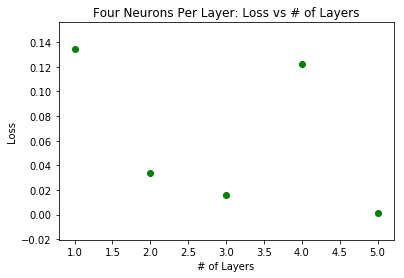

In [49]:
#figure of loss vs # of Layers
x_4 = [1,2,3,4,5]
y_4 = [scores_lay_one_four, scores_lay_two_four, scores_lay_three_four, scores_lay_four_four, scores_lay_five_four]

plt.scatter(x_4,y_4, c='g');
plt.title('Four Neurons Per Layer: Loss vs # of Layers')
plt.xlabel('# of Layers')
plt.ylabel('Loss')

# Part 1 Question 2: Observations  

Text(0, 0.5, 'Loss')

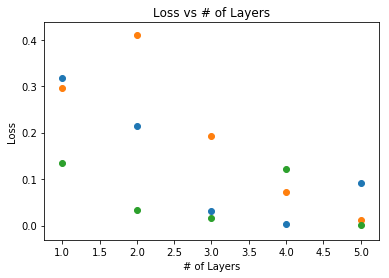

In [50]:
#Summary plot of Layer/Neruon Modulation

plt.scatter(x_2,y_2)
plt.scatter(x_3,y_3)
plt.scatter(x_4,y_4)
plt.title('Loss vs # of Layers')
plt.xlabel('# of Layers')
plt.ylabel('Loss')

Observations: Collectivley speaking, the more layers and neurons the lower the loss. 

Selection: 5 layers, 4 neurons in each layer. 

# Part 1 Question 3: compare Activators tanh, sigmoid, softplus, relu

Activation Tanh:

In [51]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [52]:
#Five layers, four neurons per layer
optimal_tanh = Sequential()

#hidden layers
optimal_tanh.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_tanh.add(Dense(4, activation='tanh'))
optimal_tanh.add(Dense(4, activation='tanh'))
optimal_tanh.add(Dense(4, activation='tanh'))
optimal_tanh.add(Dense(4, activation='tanh'))

#output layer
optimal_tanh.add(Dense(1, activation='tanh'))

sgd = SGD(lr=0.1)
optimal_tanh.compile(loss='binary_crossentropy', optimizer='sgd')

optimal_tanh.fit(X, y, batch_size=2, epochs=400)
print(optimal_tanh.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_tanh = optimal_tanh.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 3ms/step - loss: 8.0700
Epoch 2/400
160/160 [==============================] - 0s 309us/step - loss: 8.0590
Epoch 3/400
160/160 [==============================] - 0s 299us/step - loss: 8.0590
Epoch 4/400
160/160 [==============================] - 0s 290us/step - loss: 8.0590
Epoch 5/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 6/400
160/160 [==============================] - 0s 299us/step - loss: 8.0590
Epoch 7/400
160/160 [==============================] - 0s 302us/step - loss: 8.0590
Epoch 8/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 9/400
160/160 [==============================] - 0s 296us/step - loss: 8.0590
Epoch 10/400
160/160 [==============================] - 0s 305us/step - loss: 8.0590
Epoch 11/400
160/160 [==============================] - 0s 296us/step - loss: 8.0590
Epoch 12/400
160/160 [==============================] - 0s 293us/step - loss

160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 98/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 99/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 100/400
160/160 [==============================] - 0s 277us/step - loss: 8.0590
Epoch 101/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 102/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 103/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 104/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 105/400
160/160 [==============================] - 0s 277us/step - loss: 8.0590
Epoch 106/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 107/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 108/400
160/160 [==============================] - 0s 281us/step

160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 193/400
160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 194/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 195/400
160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 196/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 197/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 198/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 199/400
160/160 [==============================] - 0s 377us/step - loss: 8.0590
Epoch 200/400
160/160 [==============================] - 0s 374us/step - loss: 8.0590
Epoch 201/400
160/160 [==============================] - 0s 312us/step - loss: 8.0590
Epoch 202/400
160/160 [==============================] - 0s 299us/step - loss: 8.0590
Epoch 203/400
160/160 [==============================] - 0s 318us/st

160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 288/400
160/160 [==============================] - 0s 277us/step - loss: 8.0590
Epoch 289/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 290/400
160/160 [==============================] - 0s 274us/step - loss: 8.0590
Epoch 291/400
160/160 [==============================] - 0s 284us/step - loss: 8.0590
Epoch 292/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 293/400
160/160 [==============================] - 0s 299us/step - loss: 8.0590
Epoch 294/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 295/400
160/160 [==============================] - 0s 281us/step - loss: 8.0590
Epoch 296/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 297/400
160/160 [==============================] - 0s 281us/step - loss: 8.0590
Epoch 298/400
160/160 [==============================] - 0s 274us/st

160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 383/400
160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 384/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 385/400
160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 386/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 387/400
160/160 [==============================] - 0s 299us/step - loss: 8.0590
Epoch 388/400
160/160 [==============================] - 0s 287us/step - loss: 8.0590
Epoch 389/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 390/400
160/160 [==============================] - 0s 281us/step - loss: 8.0590
Epoch 391/400
160/160 [==============================] - 0s 293us/step - loss: 8.0590
Epoch 392/400
160/160 [==============================] - 0s 280us/step - loss: 8.0590
Epoch 393/400
160/160 [==============================] - 0s 281us/st

d:\python365\lib\site-packages\keras\engine\sequential.py:247: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


In [53]:
#Five layers, four neurons per layer: loss
scores_optimal_tanh, optimal_tanh.metrics_names

(8.059047738974616, ['loss'])

Activation sigmoid:

In [54]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [55]:
#Five layers, four neurons per layer
optimal_sigmoid = Sequential()

#hidden layers
optimal_sigmoid.add(Dense(4, input_dim=2, activation='sigmoid')) 
optimal_sigmoid.add(Dense(4, activation='sigmoid'))
optimal_sigmoid.add(Dense(4, activation='sigmoid'))
optimal_sigmoid.add(Dense(4, activation='sigmoid'))
optimal_sigmoid.add(Dense(4, activation='sigmoid'))

#output layer
optimal_sigmoid.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
optimal_sigmoid.compile(loss='binary_crossentropy', optimizer='sgd')

optimal_sigmoid.fit(X, y, batch_size=2, epochs=400)
print(optimal_sigmoid.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_sigmoid = optimal_sigmoid.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7021
Epoch 2/400
160/160 [==============================] - 0s 309us/step - loss: 0.6979
Epoch 3/400
160/160 [==============================] - 0s 312us/step - loss: 0.6961
Epoch 4/400
160/160 [==============================] - 0s 309us/step - loss: 0.6948
Epoch 5/400
160/160 [==============================] - 0s 293us/step - loss: 0.6946
Epoch 6/400
160/160 [==============================] - 0s 299us/step - loss: 0.6943
Epoch 7/400
160/160 [==============================] - 0s 280us/step - loss: 0.6943
Epoch 8/400
160/160 [==============================] - 0s 293us/step - loss: 0.6940
Epoch 9/400
160/160 [==============================] - 0s 299us/step - loss: 0.6946
Epoch 10/400
160/160 [==============================] - 0s 299us/step - loss: 0.6945
Epoch 11/400
160/160 [==============================] - 0s 299us/step - loss: 0.6944
Epoch 12/400
160/160 [==============================] - 0s 299us/step - loss

160/160 [==============================] - 0s 280us/step - loss: 0.6942
Epoch 98/400
160/160 [==============================] - 0s 287us/step - loss: 0.6944
Epoch 99/400
160/160 [==============================] - 0s 280us/step - loss: 0.6944
Epoch 100/400
160/160 [==============================] - 0s 281us/step - loss: 0.6944
Epoch 101/400
160/160 [==============================] - 0s 284us/step - loss: 0.6945
Epoch 102/400
160/160 [==============================] - 0s 280us/step - loss: 0.6943
Epoch 103/400
160/160 [==============================] - 0s 284us/step - loss: 0.6941
Epoch 104/400
160/160 [==============================] - 0s 281us/step - loss: 0.6942
Epoch 105/400
160/160 [==============================] - 0s 277us/step - loss: 0.6945
Epoch 106/400
160/160 [==============================] - 0s 281us/step - loss: 0.6943
Epoch 107/400
160/160 [==============================] - 0s 274us/step - loss: 0.6944
Epoch 108/400
160/160 [==============================] - 0s 293us/step

160/160 [==============================] - 0s 284us/step - loss: 0.6943
Epoch 193/400
160/160 [==============================] - 0s 281us/step - loss: 0.6944
Epoch 194/400
160/160 [==============================] - 0s 287us/step - loss: 0.6942
Epoch 195/400
160/160 [==============================] - 0s 287us/step - loss: 0.6944
Epoch 196/400
160/160 [==============================] - 0s 299us/step - loss: 0.6944
Epoch 197/400
160/160 [==============================] - 0s 293us/step - loss: 0.6944
Epoch 198/400
160/160 [==============================] - 0s 281us/step - loss: 0.6945
Epoch 199/400
160/160 [==============================] - 0s 287us/step - loss: 0.6946
Epoch 200/400
160/160 [==============================] - 0s 287us/step - loss: 0.6945
Epoch 201/400
160/160 [==============================] - 0s 287us/step - loss: 0.6942
Epoch 202/400
160/160 [==============================] - 0s 280us/step - loss: 0.6940
Epoch 203/400
160/160 [==============================] - 0s 281us/st

160/160 [==============================] - 0s 293us/step - loss: 0.6943
Epoch 288/400
160/160 [==============================] - 0s 281us/step - loss: 0.6943
Epoch 289/400
160/160 [==============================] - 0s 287us/step - loss: 0.6942
Epoch 290/400
160/160 [==============================] - 0s 280us/step - loss: 0.6944
Epoch 291/400
160/160 [==============================] - 0s 287us/step - loss: 0.6943
Epoch 292/400
160/160 [==============================] - 0s 280us/step - loss: 0.6945
Epoch 293/400
160/160 [==============================] - 0s 287us/step - loss: 0.6943
Epoch 294/400
160/160 [==============================] - 0s 280us/step - loss: 0.6944
Epoch 295/400
160/160 [==============================] - 0s 281us/step - loss: 0.6943
Epoch 296/400
160/160 [==============================] - 0s 280us/step - loss: 0.6945
Epoch 297/400
160/160 [==============================] - 0s 280us/step - loss: 0.6945
Epoch 298/400
160/160 [==============================] - 0s 293us/st

160/160 [==============================] - 0s 299us/step - loss: 0.6942
Epoch 383/400
160/160 [==============================] - 0s 280us/step - loss: 0.6945
Epoch 384/400
160/160 [==============================] - 0s 281us/step - loss: 0.6946
Epoch 385/400
160/160 [==============================] - 0s 277us/step - loss: 0.6943
Epoch 386/400
160/160 [==============================] - 0s 287us/step - loss: 0.6941
Epoch 387/400
160/160 [==============================] - 0s 284us/step - loss: 0.6943
Epoch 388/400
160/160 [==============================] - 0s 280us/step - loss: 0.6943
Epoch 389/400
160/160 [==============================] - 0s 284us/step - loss: 0.6945
Epoch 390/400
160/160 [==============================] - 0s 280us/step - loss: 0.6943
Epoch 391/400
160/160 [==============================] - 0s 280us/step - loss: 0.6942
Epoch 392/400
160/160 [==============================] - 0s 287us/step - loss: 0.6943
Epoch 393/400
160/160 [==============================] - 0s 305us/st

In [56]:
#Five layers, four neurons per layer: loss
scores_optimal_sigmoid, optimal_sigmoid.metrics_names

(0.6931670546531677, ['loss'])

Activation softplus:

In [57]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [58]:
#Five layers, four neurons per layer
optimal_softplus = Sequential()

#hidden layers
optimal_softplus.add(Dense(4, input_dim=2, activation='softplus')) 
optimal_softplus.add(Dense(4, activation='softplus'))
optimal_softplus.add(Dense(4, activation='softplus'))
optimal_softplus.add(Dense(4, activation='softplus'))
optimal_softplus.add(Dense(4, activation='softplus'))

#output layer
optimal_softplus.add(Dense(1, activation='softplus'))

sgd = SGD(lr=0.1)
optimal_softplus.compile(loss='binary_crossentropy', optimizer='sgd')

optimal_softplus.fit(X, y, batch_size=2, epochs=400)
print(optimal_softplus.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_softplus = optimal_softplus.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7063
Epoch 2/400
160/160 [==============================] - 0s 305us/step - loss: 0.7022
Epoch 3/400
160/160 [==============================] - 0s 299us/step - loss: 0.7030
Epoch 4/400
160/160 [==============================] - 0s 305us/step - loss: 0.7013
Epoch 5/400
160/160 [==============================] - 0s 299us/step - loss: 0.6990
Epoch 6/400
160/160 [==============================] - 0s 305us/step - loss: 0.7033
Epoch 7/400
160/160 [==============================] - 0s 299us/step - loss: 0.7022
Epoch 8/400
160/160 [==============================] - 0s 293us/step - loss: 0.7035
Epoch 9/400
160/160 [==============================] - 0s 293us/step - loss: 0.6991
Epoch 10/400
160/160 [==============================] - 0s 299us/step - loss: 0.6855
Epoch 11/400
160/160 [==============================] - 0s 293us/step - loss: 0.7038
Epoch 12/400
160/160 [==============================] - 0s 299us/step - loss

160/160 [==============================] - 0s 280us/step - loss: 0.6995
Epoch 98/400
160/160 [==============================] - 0s 299us/step - loss: 0.6975
Epoch 99/400
160/160 [==============================] - 0s 287us/step - loss: 0.6992
Epoch 100/400
160/160 [==============================] - 0s 281us/step - loss: 0.6993
Epoch 101/400
160/160 [==============================] - 0s 293us/step - loss: 0.6989
Epoch 102/400
160/160 [==============================] - 0s 302us/step - loss: 0.6998
Epoch 103/400
160/160 [==============================] - 0s 293us/step - loss: 0.6997
Epoch 104/400
160/160 [==============================] - 0s 284us/step - loss: 0.6983
Epoch 105/400
160/160 [==============================] - 0s 287us/step - loss: 0.6971
Epoch 106/400
160/160 [==============================] - 0s 321us/step - loss: 0.6972
Epoch 107/400
160/160 [==============================] - 0s 299us/step - loss: 0.7001
Epoch 108/400
160/160 [==============================] - 0s 305us/step

160/160 [==============================] - 0s 293us/step - loss: 0.6931
Epoch 193/400
160/160 [==============================] - 0s 287us/step - loss: 0.6899
Epoch 194/400
160/160 [==============================] - 0s 287us/step - loss: 0.6916
Epoch 195/400
160/160 [==============================] - 0s 293us/step - loss: 0.6886
Epoch 196/400
160/160 [==============================] - 0s 293us/step - loss: 0.6918
Epoch 197/400
160/160 [==============================] - 0s 280us/step - loss: 0.6913
Epoch 198/400
160/160 [==============================] - 0s 293us/step - loss: 0.6895
Epoch 199/400
160/160 [==============================] - 0s 280us/step - loss: 0.6890
Epoch 200/400
160/160 [==============================] - 0s 287us/step - loss: 0.6878
Epoch 201/400
160/160 [==============================] - 0s 293us/step - loss: 0.6890
Epoch 202/400
160/160 [==============================] - 0s 299us/step - loss: 0.6867
Epoch 203/400
160/160 [==============================] - 0s 299us/st

160/160 [==============================] - 0s 281us/step - loss: 0.4552
Epoch 288/400
160/160 [==============================] - 0s 287us/step - loss: 0.5982
Epoch 289/400
160/160 [==============================] - 0s 287us/step - loss: 0.6432
Epoch 290/400
160/160 [==============================] - 0s 293us/step - loss: 0.4775
Epoch 291/400
160/160 [==============================] - 0s 287us/step - loss: 0.4640
Epoch 292/400
160/160 [==============================] - 0s 287us/step - loss: 0.4477
Epoch 293/400
160/160 [==============================] - 0s 293us/step - loss: 0.4500
Epoch 294/400
160/160 [==============================] - 0s 299us/step - loss: 0.4487
Epoch 295/400
160/160 [==============================] - 0s 312us/step - loss: 0.5303
Epoch 296/400
160/160 [==============================] - 0s 299us/step - loss: 0.4464
Epoch 297/400
160/160 [==============================] - 0s 293us/step - loss: 0.4373
Epoch 298/400
160/160 [==============================] - 0s 299us/st

160/160 [==============================] - 0s 299us/step - loss: 0.4142
Epoch 383/400
160/160 [==============================] - 0s 299us/step - loss: 0.4128
Epoch 384/400
160/160 [==============================] - 0s 293us/step - loss: 0.4122
Epoch 385/400
160/160 [==============================] - 0s 290us/step - loss: 0.4129
Epoch 386/400
160/160 [==============================] - 0s 293us/step - loss: 0.4124
Epoch 387/400
160/160 [==============================] - 0s 293us/step - loss: 0.4123
Epoch 388/400
160/160 [==============================] - 0s 284us/step - loss: 0.4056
Epoch 389/400
160/160 [==============================] - 0s 293us/step - loss: 0.4121
Epoch 390/400
160/160 [==============================] - 0s 284us/step - loss: 0.4097
Epoch 391/400
160/160 [==============================] - 0s 287us/step - loss: 0.4162
Epoch 392/400
160/160 [==============================] - 0s 284us/step - loss: 0.4122
Epoch 393/400
160/160 [==============================] - 0s 299us/st

In [59]:
#Five layers, four neurons per layer: loss
scores_optimal_softplus, optimal_softplus.metrics_names

(0.3957903027534485, ['loss'])

Activation relu:

In [60]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [61]:
#Five layers, four neurons per layer
optimal_relu = Sequential()

#hidden layers
optimal_relu.add(Dense(4, input_dim=2, activation='relu')) 
optimal_relu.add(Dense(4, activation='relu'))
optimal_relu.add(Dense(4, activation='relu'))
optimal_relu.add(Dense(4, activation='relu'))
optimal_relu.add(Dense(4, activation='relu'))

#output layer
optimal_relu.add(Dense(1, activation='relu'))

sgd = SGD(lr=0.1)
optimal_relu.compile(loss='binary_crossentropy', optimizer='sgd')

optimal_relu.fit(X, y, batch_size=2, epochs=400)
print(optimal_relu.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_relu = optimal_relu.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 3ms/step - loss: 8.0771
Epoch 2/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 3/400
160/160 [==============================] - 0s 337us/step - loss: 7.9712
Epoch 4/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 5/400
160/160 [==============================] - 0s 318us/step - loss: 7.9712
Epoch 6/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 7/400
160/160 [==============================] - 0s 302us/step - loss: 7.9712
Epoch 8/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 9/400
160/160 [==============================] - 0s 296us/step - loss: 7.9712
Epoch 10/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 11/400
160/160 [==============================] - 0s 318us/step - loss: 7.9712
Epoch 12/400
160/160 [==============================] - 0s 305us/step - loss

160/160 [==============================] - 0s 280us/step - loss: 7.9712
Epoch 98/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 99/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 100/400
160/160 [==============================] - 0s 287us/step - loss: 7.9712
Epoch 101/400
160/160 [==============================] - 0s 287us/step - loss: 7.9712
Epoch 102/400
160/160 [==============================] - 0s 284us/step - loss: 7.9712
Epoch 103/400
160/160 [==============================] - 0s 287us/step - loss: 7.9712
Epoch 104/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 105/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 106/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 107/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 108/400
160/160 [==============================] - 0s 287us/step

160/160 [==============================] - 0s 324us/step - loss: 7.9712
Epoch 193/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 194/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 195/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 196/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 197/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 198/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 199/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 200/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 201/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 202/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 203/400
160/160 [==============================] - 0s 299us/st

160/160 [==============================] - 0s 324us/step - loss: 7.9712
Epoch 288/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 289/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 290/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 291/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 292/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 293/400
160/160 [==============================] - 0s 302us/step - loss: 7.9712
Epoch 294/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 295/400
160/160 [==============================] - 0s 290us/step - loss: 7.9712
Epoch 296/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 297/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 298/400
160/160 [==============================] - 0s 287us/st

160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 383/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 384/400
160/160 [==============================] - 0s 287us/step - loss: 7.9712
Epoch 385/400
160/160 [==============================] - 0s 290us/step - loss: 7.9712
Epoch 386/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 387/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 388/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 389/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 390/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 391/400
160/160 [==============================] - 0s 318us/step - loss: 7.9712
Epoch 392/400
160/160 [==============================] - 0s 287us/step - loss: 7.9712
Epoch 393/400
160/160 [==============================] - 0s 293us/st

In [62]:
#Five layers, four neurons per layer: loss
scores_optimal_relu, optimal_relu.metrics_names

(7.971192407608049, ['loss'])

Activation softmax:

In [63]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [64]:
#Five layers, four neurons per layer
optimal_softmax = Sequential()

#hidden layers
optimal_softmax.add(Dense(4, input_dim=2, activation='softmax')) 
optimal_softmax.add(Dense(4, activation='softmax'))
optimal_softmax.add(Dense(4, activation='softmax'))
optimal_softmax.add(Dense(4, activation='softmax'))
optimal_softmax.add(Dense(4, activation='softmax'))

#output layer
optimal_softmax.add(Dense(1, activation='softmax'))

sgd = SGD(lr=0.1)
optimal_softmax.compile(loss='binary_crossentropy', optimizer='sgd')

optimal_softmax.fit(X, y, batch_size=2, epochs=400)
print(optimal_softmax.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_softmax = optimal_softmax.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 0s 3ms/step - loss: 7.9712
Epoch 2/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 3/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 4/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 5/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 6/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 7/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 8/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 9/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 10/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 11/400
160/160 [==============================] - 0s 321us/step - loss: 7.9712
Epoch 12/400
160/160 [==============================] - 0s 305us/step - loss

160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 98/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 99/400
160/160 [==============================] - 0s 318us/step - loss: 7.9712
Epoch 100/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 101/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 102/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 103/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 104/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 105/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 106/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 107/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 108/400
160/160 [==============================] - 0s 299us/step

160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 193/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 194/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 195/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 196/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 197/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 198/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 199/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 200/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 201/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 202/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 203/400
160/160 [==============================] - 0s 299us/st

160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 288/400
160/160 [==============================] - 0s 296us/step - loss: 7.9712
Epoch 289/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 290/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 291/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 292/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 293/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 294/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 295/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 296/400
160/160 [==============================] - 0s 312us/step - loss: 7.9712
Epoch 297/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 298/400
160/160 [==============================] - 0s 299us/st

160/160 [==============================] - 0s 330us/step - loss: 7.9712
Epoch 383/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 384/400
160/160 [==============================] - 0s 293us/step - loss: 7.9712
Epoch 385/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 386/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 387/400
160/160 [==============================] - 0s 302us/step - loss: 7.9712
Epoch 388/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 389/400
160/160 [==============================] - 0s 302us/step - loss: 7.9712
Epoch 390/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 391/400
160/160 [==============================] - 0s 299us/step - loss: 7.9712
Epoch 392/400
160/160 [==============================] - 0s 305us/step - loss: 7.9712
Epoch 393/400
160/160 [==============================] - 0s 305us/st

In [65]:
#Five layers, four neurons per layer: loss
scores_optimal_softmax, optimal_softmax.metrics_names

(7.971192407608049, ['loss'])

Text(0, 0.5, 'Loss')

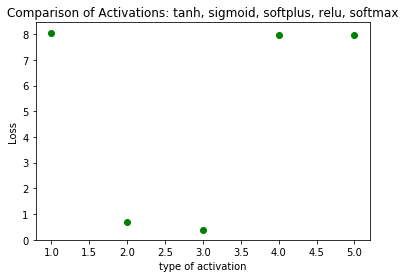

In [66]:
#Summary plot of Layer/Neruon Modulation
#figure of loss vs # of Layers
x_compare = [1,2,3,4,5]
y_compare = [scores_optimal_tanh, scores_optimal_sigmoid, scores_optimal_softplus, scores_optimal_relu, scores_optimal_softmax]

plt.scatter(x_compare,y_compare, c='g');
plt.title('Comparison of Activations: tanh, sigmoid, softplus, relu, softmax')
plt.xlabel('type of activation')
plt.ylabel('Loss')

Observation: If just using one activation type, in this situation go with softplus. 

# Part 1 Question 4: Compare alternative optimizers RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

(Using Optimal from Questions 1-3)

RMSprop

In [67]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [68]:
#Five layers, four neurons per layer
optimal_RMSprop = Sequential()

#hidden layers
optimal_RMSprop.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_RMSprop.add(Dense(4, activation='tanh'))
optimal_RMSprop.add(Dense(4, activation='tanh'))
optimal_RMSprop.add(Dense(4, activation='tanh'))
optimal_RMSprop.add(Dense(4, activation='tanh'))

#output layer
optimal_RMSprop.add(Dense(1, activation='sigmoid'))

RMSprop = RMSprop(lr=0.1)
optimal_RMSprop.compile(loss='binary_crossentropy', optimizer='RMSprop')

optimal_RMSprop.fit(X, y, batch_size=2, epochs=400)
print(optimal_RMSprop.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_RMSprop = optimal_RMSprop.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 1s 3ms/step - loss: 0.6985
Epoch 2/400
160/160 [==============================] - 0s 334us/step - loss: 0.6854
Epoch 3/400
160/160 [==============================] - 0s 343us/step - loss: 0.6758
Epoch 4/400
160/160 [==============================] - 0s 330us/step - loss: 0.6662
Epoch 5/400
160/160 [==============================] - 0s 343us/step - loss: 0.6558
Epoch 6/400
160/160 [==============================] - 0s 337us/step - loss: 0.6435
Epoch 7/400
160/160 [==============================] - 0s 324us/step - loss: 0.6281
Epoch 8/400
160/160 [==============================] - 0s 343us/step - loss: 0.6089
Epoch 9/400
160/160 [==============================] - 0s 330us/step - loss: 0.5884
Epoch 10/400
160/160 [==============================] - 0s 343us/step - loss: 0.5631
Epoch 11/400
160/160 [==============================] - 0s 337us/step - loss: 0.5364
Epoch 12/400
160/160 [==============================] - 0s 337us/step - loss

160/160 [==============================] - 0s 330us/step - loss: 0.1639
Epoch 98/400
160/160 [==============================] - 0s 330us/step - loss: 0.1642
Epoch 99/400
160/160 [==============================] - 0s 324us/step - loss: 0.1647
Epoch 100/400
160/160 [==============================] - 0s 349us/step - loss: 0.1656
Epoch 101/400
160/160 [==============================] - 0s 324us/step - loss: 0.1603
Epoch 102/400
160/160 [==============================] - 0s 340us/step - loss: 0.1613
Epoch 103/400
160/160 [==============================] - 0s 318us/step - loss: 0.1597
Epoch 104/400
160/160 [==============================] - 0s 337us/step - loss: 0.1573
Epoch 105/400
160/160 [==============================] - 0s 324us/step - loss: 0.1577
Epoch 106/400
160/160 [==============================] - 0s 324us/step - loss: 0.1548
Epoch 107/400
160/160 [==============================] - 0s 324us/step - loss: 0.1554
Epoch 108/400
160/160 [==============================] - 0s 324us/step

160/160 [==============================] - 0s 337us/step - loss: 0.0851
Epoch 193/400
160/160 [==============================] - 0s 318us/step - loss: 0.0881
Epoch 194/400
160/160 [==============================] - 0s 343us/step - loss: 0.0840
Epoch 195/400
160/160 [==============================] - 0s 318us/step - loss: 0.0876
Epoch 196/400
160/160 [==============================] - 0s 324us/step - loss: 0.0850
Epoch 197/400
160/160 [==============================] - 0s 324us/step - loss: 0.0834
Epoch 198/400
160/160 [==============================] - 0s 337us/step - loss: 0.0876
Epoch 199/400
160/160 [==============================] - 0s 324us/step - loss: 0.0814
Epoch 200/400
160/160 [==============================] - 0s 330us/step - loss: 0.0804
Epoch 201/400
160/160 [==============================] - 0s 330us/step - loss: 0.0859
Epoch 202/400
160/160 [==============================] - 0s 324us/step - loss: 0.0828
Epoch 203/400
160/160 [==============================] - 0s 318us/st

160/160 [==============================] - 0s 337us/step - loss: 0.0722
Epoch 288/400
160/160 [==============================] - 0s 343us/step - loss: 0.0689
Epoch 289/400
160/160 [==============================] - 0s 324us/step - loss: 0.0661
Epoch 290/400
160/160 [==============================] - 0s 324us/step - loss: 0.0699
Epoch 291/400
160/160 [==============================] - 0s 318us/step - loss: 0.0669
Epoch 292/400
160/160 [==============================] - 0s 324us/step - loss: 0.0683
Epoch 293/400
160/160 [==============================] - 0s 330us/step - loss: 0.0677
Epoch 294/400
160/160 [==============================] - 0s 318us/step - loss: 0.0702
Epoch 295/400
160/160 [==============================] - 0s 324us/step - loss: 0.0762
Epoch 296/400
160/160 [==============================] - 0s 318us/step - loss: 0.0696
Epoch 297/400
160/160 [==============================] - 0s 324us/step - loss: 0.0700
Epoch 298/400
160/160 [==============================] - 0s 324us/st

160/160 [==============================] - 0s 349us/step - loss: 0.0722
Epoch 383/400
160/160 [==============================] - 0s 343us/step - loss: 0.0700
Epoch 384/400
160/160 [==============================] - 0s 337us/step - loss: 0.0643
Epoch 385/400
160/160 [==============================] - 0s 343us/step - loss: 0.0696
Epoch 386/400
160/160 [==============================] - 0s 343us/step - loss: 0.0747
Epoch 387/400
160/160 [==============================] - 0s 337us/step - loss: 0.0678
Epoch 388/400
160/160 [==============================] - 0s 337us/step - loss: 0.0735
Epoch 389/400
160/160 [==============================] - 0s 330us/step - loss: 0.0680
Epoch 390/400
160/160 [==============================] - 0s 334us/step - loss: 0.0675
Epoch 391/400
160/160 [==============================] - 0s 324us/step - loss: 0.0754
Epoch 392/400
160/160 [==============================] - 0s 327us/step - loss: 0.0665
Epoch 393/400
160/160 [==============================] - 0s 330us/st

In [69]:
#Five layers, four neurons per layer: loss
scores_optimal_RMSprop, optimal_RMSprop.metrics_names

(0.05872122924774885, ['loss'])

Adagrad

In [70]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [71]:
#Five layers, four neurons per layer
optimal_Adagrad = Sequential()

#hidden layers
optimal_Adagrad.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_Adagrad.add(Dense(4, activation='tanh'))
optimal_Adagrad.add(Dense(4, activation='tanh'))
optimal_Adagrad.add(Dense(4, activation='tanh'))
optimal_Adagrad.add(Dense(4, activation='tanh'))

#output layer
optimal_Adagrad.add(Dense(1, activation='sigmoid'))

Adagrad = Adagrad(lr=0.1)
optimal_Adagrad.compile(loss='binary_crossentropy', optimizer='RMSprop')

optimal_Adagrad.fit(X, y, batch_size=2, epochs=400)
print(optimal_Adagrad.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_Adagrad = optimal_Adagrad.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 1s 4ms/step - loss: 0.7074
Epoch 2/400
160/160 [==============================] - 0s 355us/step - loss: 0.7003
Epoch 3/400
160/160 [==============================] - 0s 349us/step - loss: 0.6970
Epoch 4/400
160/160 [==============================] - 0s 340us/step - loss: 0.6950
Epoch 5/400
160/160 [==============================] - 0s 337us/step - loss: 0.6932
Epoch 6/400
160/160 [==============================] - 0s 340us/step - loss: 0.6918
Epoch 7/400
160/160 [==============================] - 0s 343us/step - loss: 0.6892
Epoch 8/400
160/160 [==============================] - 0s 340us/step - loss: 0.6862
Epoch 9/400
160/160 [==============================] - 0s 352us/step - loss: 0.6814
Epoch 10/400
160/160 [==============================] - 0s 343us/step - loss: 0.6753
Epoch 11/400
160/160 [==============================] - 0s 349us/step - loss: 0.6665
Epoch 12/400
160/160 [==============================] - 0s 343us/step - loss

160/160 [==============================] - 0s 330us/step - loss: 0.2044
Epoch 98/400
160/160 [==============================] - 0s 340us/step - loss: 0.2009
Epoch 99/400
160/160 [==============================] - 0s 334us/step - loss: 0.1987
Epoch 100/400
160/160 [==============================] - 0s 337us/step - loss: 0.2015
Epoch 101/400
160/160 [==============================] - 0s 337us/step - loss: 0.1981
Epoch 102/400
160/160 [==============================] - 0s 349us/step - loss: 0.1968
Epoch 103/400
160/160 [==============================] - 0s 337us/step - loss: 0.1954
Epoch 104/400
160/160 [==============================] - 0s 337us/step - loss: 0.1938
Epoch 105/400
160/160 [==============================] - 0s 349us/step - loss: 0.1911
Epoch 106/400
160/160 [==============================] - 0s 343us/step - loss: 0.1909
Epoch 107/400
160/160 [==============================] - 0s 361us/step - loss: 0.1883
Epoch 108/400
160/160 [==============================] - 0s 343us/step

160/160 [==============================] - 0s 349us/step - loss: 0.1026
Epoch 193/400
160/160 [==============================] - 0s 349us/step - loss: 0.1112
Epoch 194/400
160/160 [==============================] - 0s 337us/step - loss: 0.1084
Epoch 195/400
160/160 [==============================] - 0s 337us/step - loss: 0.1051
Epoch 196/400
160/160 [==============================] - 0s 337us/step - loss: 0.1059
Epoch 197/400
160/160 [==============================] - 0s 374us/step - loss: 0.1015
Epoch 198/400
160/160 [==============================] - 0s 386us/step - loss: 0.0993
Epoch 199/400
160/160 [==============================] - 0s 349us/step - loss: 0.1014
Epoch 200/400
160/160 [==============================] - 0s 349us/step - loss: 0.0990
Epoch 201/400
160/160 [==============================] - 0s 330us/step - loss: 0.1055
Epoch 202/400
160/160 [==============================] - 0s 337us/step - loss: 0.0990
Epoch 203/400
160/160 [==============================] - 0s 486us/st

160/160 [==============================] - 0s 380us/step - loss: 0.0675
Epoch 288/400
160/160 [==============================] - 0s 355us/step - loss: 0.0633
Epoch 289/400
160/160 [==============================] - 0s 355us/step - loss: 0.0708
Epoch 290/400
160/160 [==============================] - 0s 355us/step - loss: 0.0685
Epoch 291/400
160/160 [==============================] - 0s 421us/step - loss: 0.0677
Epoch 292/400
160/160 [==============================] - 0s 386us/step - loss: 0.0683
Epoch 293/400
160/160 [==============================] - 0s 368us/step - loss: 0.0671
Epoch 294/400
160/160 [==============================] - 0s 337us/step - loss: 0.0658
Epoch 295/400
160/160 [==============================] - 0s 337us/step - loss: 0.0644
Epoch 296/400
160/160 [==============================] - 0s 365us/step - loss: 0.0641
Epoch 297/400
160/160 [==============================] - 0s 355us/step - loss: 0.0634
Epoch 298/400
160/160 [==============================] - 0s 343us/st

160/160 [==============================] - 0s 346us/step - loss: 0.0481
Epoch 383/400
160/160 [==============================] - 0s 337us/step - loss: 0.0454
Epoch 384/400
160/160 [==============================] - 0s 337us/step - loss: 0.0495
Epoch 385/400
160/160 [==============================] - 0s 343us/step - loss: 0.0424
Epoch 386/400
160/160 [==============================] - 0s 330us/step - loss: 0.0554
Epoch 387/400
160/160 [==============================] - 0s 343us/step - loss: 0.0486
Epoch 388/400
160/160 [==============================] - 0s 343us/step - loss: 0.0511
Epoch 389/400
160/160 [==============================] - 0s 343us/step - loss: 0.0476
Epoch 390/400
160/160 [==============================] - 0s 343us/step - loss: 0.0495
Epoch 391/400
160/160 [==============================] - 0s 324us/step - loss: 0.0415
Epoch 392/400
160/160 [==============================] - 0s 337us/step - loss: 0.0487
Epoch 393/400
160/160 [==============================] - 0s 337us/st

In [72]:
#Five layers, four neurons per layer: loss
scores_optimal_Adagrad, optimal_Adagrad.metrics_names

(0.03916203724220395, ['loss'])

Adadelta

In [73]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [74]:
#Five layers, four neurons per layer
optimal_Adadelta = Sequential()

#hidden layers
optimal_Adadelta.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_Adadelta.add(Dense(4, activation='tanh'))
optimal_Adadelta.add(Dense(4, activation='tanh'))
optimal_Adadelta.add(Dense(4, activation='tanh'))
optimal_Adadelta.add(Dense(4, activation='tanh'))

#output layer
optimal_Adadelta.add(Dense(1, activation='sigmoid'))

Adadelta = Adadelta(lr=0.1)
optimal_Adadelta.compile(loss='binary_crossentropy', optimizer='RMSprop')

optimal_Adadelta.fit(X, y, batch_size=2, epochs=400)
print(optimal_Adadelta.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_Adadelta = optimal_Adadelta.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 1s 4ms/step - loss: 0.6959
Epoch 2/400
160/160 [==============================] - 0s 346us/step - loss: 0.6946
Epoch 3/400
160/160 [==============================] - 0s 368us/step - loss: 0.6935
Epoch 4/400
160/160 [==============================] - 0s 390us/step - loss: 0.6925
Epoch 5/400
160/160 [==============================] - 0s 368us/step - loss: 0.6908
Epoch 6/400
160/160 [==============================] - 0s 362us/step - loss: 0.6891
Epoch 7/400
160/160 [==============================] - 0s 358us/step - loss: 0.6864
Epoch 8/400
160/160 [==============================] - 0s 349us/step - loss: 0.6839
Epoch 9/400
160/160 [==============================] - 0s 399us/step - loss: 0.6801
Epoch 10/400
160/160 [==============================] - 0s 377us/step - loss: 0.6755
Epoch 11/400
160/160 [==============================] - 0s 374us/step - loss: 0.6698
Epoch 12/400
160/160 [==============================] - 0s 405us/step - loss

160/160 [==============================] - 0s 355us/step - loss: 0.2801
Epoch 98/400
160/160 [==============================] - 0s 337us/step - loss: 0.2698
Epoch 99/400
160/160 [==============================] - 0s 349us/step - loss: 0.2694
Epoch 100/400
160/160 [==============================] - 0s 343us/step - loss: 0.2606
Epoch 101/400
160/160 [==============================] - 0s 343us/step - loss: 0.2546
Epoch 102/400
160/160 [==============================] - 0s 337us/step - loss: 0.2463
Epoch 103/400
160/160 [==============================] - 0s 346us/step - loss: 0.2483
Epoch 104/400
160/160 [==============================] - 0s 349us/step - loss: 0.2407
Epoch 105/400
160/160 [==============================] - 0s 340us/step - loss: 0.2341
Epoch 106/400
160/160 [==============================] - 0s 365us/step - loss: 0.2306
Epoch 107/400
160/160 [==============================] - 0s 337us/step - loss: 0.2260
Epoch 108/400
160/160 [==============================] - 0s 334us/step

160/160 [==============================] - 0s 349us/step - loss: 0.0965
Epoch 193/400
160/160 [==============================] - 0s 355us/step - loss: 0.0988
Epoch 194/400
160/160 [==============================] - 0s 343us/step - loss: 0.0909
Epoch 195/400
160/160 [==============================] - 0s 340us/step - loss: 0.0999
Epoch 196/400
160/160 [==============================] - 0s 349us/step - loss: 0.0968
Epoch 197/400
160/160 [==============================] - 0s 349us/step - loss: 0.0952
Epoch 198/400
160/160 [==============================] - 0s 349us/step - loss: 0.0939
Epoch 199/400
160/160 [==============================] - 0s 355us/step - loss: 0.0961
Epoch 200/400
160/160 [==============================] - 0s 371us/step - loss: 0.0938
Epoch 201/400
160/160 [==============================] - 0s 386us/step - loss: 0.0940
Epoch 202/400
160/160 [==============================] - 0s 358us/step - loss: 0.0952
Epoch 203/400
160/160 [==============================] - 0s 362us/st

160/160 [==============================] - 0s 337us/step - loss: 0.0582
Epoch 288/400
160/160 [==============================] - 0s 352us/step - loss: 0.0697
Epoch 289/400
160/160 [==============================] - 0s 349us/step - loss: 0.0589
Epoch 290/400
160/160 [==============================] - 0s 343us/step - loss: 0.0638
Epoch 291/400
160/160 [==============================] - 0s 337us/step - loss: 0.0549
Epoch 292/400
160/160 [==============================] - 0s 346us/step - loss: 0.0656
Epoch 293/400
160/160 [==============================] - 0s 337us/step - loss: 0.0559
Epoch 294/400
160/160 [==============================] - 0s 343us/step - loss: 0.0606
Epoch 295/400
160/160 [==============================] - 0s 362us/step - loss: 0.0580
Epoch 296/400
160/160 [==============================] - 0s 340us/step - loss: 0.0605
Epoch 297/400
160/160 [==============================] - 0s 343us/step - loss: 0.0566
Epoch 298/400
160/160 [==============================] - 0s 343us/st

160/160 [==============================] - 0s 355us/step - loss: 0.0323
Epoch 383/400
160/160 [==============================] - 0s 365us/step - loss: 0.0328
Epoch 384/400
160/160 [==============================] - 0s 343us/step - loss: 0.0295
Epoch 385/400
160/160 [==============================] - 0s 355us/step - loss: 0.0269
Epoch 386/400
160/160 [==============================] - 0s 343us/step - loss: 0.0428
Epoch 387/400
160/160 [==============================] - 0s 349us/step - loss: 0.0339
Epoch 388/400
160/160 [==============================] - 0s 337us/step - loss: 0.0294
Epoch 389/400
160/160 [==============================] - 0s 343us/step - loss: 0.0347
Epoch 390/400
160/160 [==============================] - 0s 349us/step - loss: 0.0324
Epoch 391/400
160/160 [==============================] - 0s 355us/step - loss: 0.0208
Epoch 392/400
160/160 [==============================] - 0s 343us/step - loss: 0.0375
Epoch 393/400
160/160 [==============================] - 0s 343us/st

In [75]:
#Five layers, four neurons per layer: loss
scores_optimal_Adadelta, optimal_Adadelta.metrics_names

(0.020268671819940208, ['loss'])

Adam

In [76]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [77]:
#Five layers, four neurons per layer
optimal_Adam = Sequential()

#hidden layers
optimal_Adam.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_Adam.add(Dense(4, activation='tanh'))
optimal_Adam.add(Dense(4, activation='tanh'))
optimal_Adam.add(Dense(4, activation='tanh'))
optimal_Adam.add(Dense(4, activation='tanh'))

#output layer
optimal_Adam.add(Dense(1, activation='sigmoid'))

Adam = Adam(lr=0.1)
optimal_Adam.compile(loss='binary_crossentropy', optimizer='RMSprop')

optimal_Adam.fit(X, y, batch_size=2, epochs=400)
print(optimal_Adam.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_Adam = optimal_Adam.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 1s 4ms/step - loss: 0.6950
Epoch 2/400
160/160 [==============================] - 0s 352us/step - loss: 0.6941
Epoch 3/400
160/160 [==============================] - 0s 365us/step - loss: 0.6934
Epoch 4/400
160/160 [==============================] - 0s 352us/step - loss: 0.6925
Epoch 5/400
160/160 [==============================] - 0s 374us/step - loss: 0.6912
Epoch 6/400
160/160 [==============================] - 0s 355us/step - loss: 0.6894
Epoch 7/400
160/160 [==============================] - 0s 380us/step - loss: 0.6866
Epoch 8/400
160/160 [==============================] - 0s 405us/step - loss: 0.6833
Epoch 9/400
160/160 [==============================] - 0s 368us/step - loss: 0.6780
Epoch 10/400
160/160 [==============================] - 0s 374us/step - loss: 0.6711
Epoch 11/400
160/160 [==============================] - 0s 349us/step - loss: 0.6624
Epoch 12/400
160/160 [==============================] - 0s 358us/step - loss

160/160 [==============================] - 0s 362us/step - loss: 0.4033
Epoch 98/400
160/160 [==============================] - 0s 343us/step - loss: 0.4057
Epoch 99/400
160/160 [==============================] - 0s 349us/step - loss: 0.4060
Epoch 100/400
160/160 [==============================] - 0s 368us/step - loss: 0.4046
Epoch 101/400
160/160 [==============================] - 0s 368us/step - loss: 0.4046
Epoch 102/400
160/160 [==============================] - 0s 346us/step - loss: 0.4011
Epoch 103/400
160/160 [==============================] - 0s 337us/step - loss: 0.4046
Epoch 104/400
160/160 [==============================] - 0s 358us/step - loss: 0.4038
Epoch 105/400
160/160 [==============================] - 0s 337us/step - loss: 0.4037
Epoch 106/400
160/160 [==============================] - 0s 343us/step - loss: 0.4029
Epoch 107/400
160/160 [==============================] - 0s 337us/step - loss: 0.4054
Epoch 108/400
160/160 [==============================] - 0s 355us/step

160/160 [==============================] - 0s 368us/step - loss: 0.3553
Epoch 193/400
160/160 [==============================] - 0s 362us/step - loss: 0.3512
Epoch 194/400
160/160 [==============================] - 0s 362us/step - loss: 0.3467
Epoch 195/400
160/160 [==============================] - 0s 349us/step - loss: 0.3473
Epoch 196/400
160/160 [==============================] - 0s 362us/step - loss: 0.3423
Epoch 197/400
160/160 [==============================] - 0s 393us/step - loss: 0.3402
Epoch 198/400
160/160 [==============================] - 0s 368us/step - loss: 0.3365
Epoch 199/400
160/160 [==============================] - 0s 346us/step - loss: 0.3331
Epoch 200/400
160/160 [==============================] - 0s 355us/step - loss: 0.3291
Epoch 201/400
160/160 [==============================] - 0s 343us/step - loss: 0.3276
Epoch 202/400
160/160 [==============================] - 0s 355us/step - loss: 0.3207
Epoch 203/400
160/160 [==============================] - 0s 355us/st

160/160 [==============================] - 0s 355us/step - loss: 0.0700
Epoch 288/400
160/160 [==============================] - 0s 343us/step - loss: 0.0705
Epoch 289/400
160/160 [==============================] - 0s 349us/step - loss: 0.0649
Epoch 290/400
160/160 [==============================] - 0s 349us/step - loss: 0.0691
Epoch 291/400
160/160 [==============================] - 0s 337us/step - loss: 0.0679
Epoch 292/400
160/160 [==============================] - 0s 337us/step - loss: 0.0707
Epoch 293/400
160/160 [==============================] - 0s 352us/step - loss: 0.0652
Epoch 294/400
160/160 [==============================] - 0s 358us/step - loss: 0.0685
Epoch 295/400
160/160 [==============================] - 0s 352us/step - loss: 0.0704
Epoch 296/400
160/160 [==============================] - 0s 343us/step - loss: 0.0687
Epoch 297/400
160/160 [==============================] - 0s 343us/step - loss: 0.0685
Epoch 298/400
160/160 [==============================] - 0s 355us/st

160/160 [==============================] - 0s 377us/step - loss: 0.0505
Epoch 383/400
160/160 [==============================] - 0s 399us/step - loss: 0.0521
Epoch 384/400
160/160 [==============================] - 0s 343us/step - loss: 0.0479
Epoch 385/400
160/160 [==============================] - 0s 349us/step - loss: 0.0512
Epoch 386/400
160/160 [==============================] - 0s 343us/step - loss: 0.0442
Epoch 387/400
160/160 [==============================] - 0s 349us/step - loss: 0.0511
Epoch 388/400
160/160 [==============================] - 0s 343us/step - loss: 0.0483
Epoch 389/400
160/160 [==============================] - 0s 355us/step - loss: 0.0471
Epoch 390/400
160/160 [==============================] - 0s 349us/step - loss: 0.0501
Epoch 391/400
160/160 [==============================] - 0s 337us/step - loss: 0.0469
Epoch 392/400
160/160 [==============================] - 0s 343us/step - loss: 0.0494
Epoch 393/400
160/160 [==============================] - 0s 346us/st

In [78]:
#Five layers, four neurons per layer: loss
scores_optimal_Adam, optimal_Adam.metrics_names

(0.03571049175225198, ['loss'])

Adamax

In [79]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [80]:
#Five layers, four neurons per layer
optimal_Adamax = Sequential()

#hidden layers
optimal_Adamax.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_Adamax.add(Dense(4, activation='tanh'))
optimal_Adamax.add(Dense(4, activation='tanh'))
optimal_Adamax.add(Dense(4, activation='tanh'))
optimal_Adamax.add(Dense(4, activation='tanh'))

#output layer
optimal_Adamax.add(Dense(1, activation='sigmoid'))

Adamax = Adamax(lr=0.1)
optimal_Adamax.compile(loss='binary_crossentropy', optimizer='RMSprop')

optimal_Adamax.fit(X, y, batch_size=2, epochs=400)
print(optimal_Adamax.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_Adamax = optimal_Adamax.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 1s 4ms/step - loss: 0.7023
Epoch 2/400
160/160 [==============================] - 0s 362us/step - loss: 0.6991
Epoch 3/400
160/160 [==============================] - 0s 368us/step - loss: 0.6969
Epoch 4/400
160/160 [==============================] - 0s 355us/step - loss: 0.6953
Epoch 5/400
160/160 [==============================] - 0s 355us/step - loss: 0.6937
Epoch 6/400
160/160 [==============================] - 0s 368us/step - loss: 0.6921
Epoch 7/400
160/160 [==============================] - 0s 365us/step - loss: 0.6903
Epoch 8/400
160/160 [==============================] - 0s 368us/step - loss: 0.6883
Epoch 9/400
160/160 [==============================] - 0s 358us/step - loss: 0.6859
Epoch 10/400
160/160 [==============================] - 0s 360us/step - loss: 0.6824
Epoch 11/400
160/160 [==============================] - 0s 362us/step - loss: 0.6779
Epoch 12/400
160/160 [==============================] - 0s 355us/step - loss

160/160 [==============================] - 0s 368us/step - loss: 0.0909
Epoch 98/400
160/160 [==============================] - 0s 368us/step - loss: 0.0850
Epoch 99/400
160/160 [==============================] - 0s 386us/step - loss: 0.0859
Epoch 100/400
160/160 [==============================] - 0s 355us/step - loss: 0.0918
Epoch 101/400
160/160 [==============================] - 0s 349us/step - loss: 0.0884
Epoch 102/400
160/160 [==============================] - 0s 355us/step - loss: 0.0960
Epoch 103/400
160/160 [==============================] - 0s 352us/step - loss: 0.0837
Epoch 104/400
160/160 [==============================] - 0s 349us/step - loss: 0.0879
Epoch 105/400
160/160 [==============================] - 0s 365us/step - loss: 0.0861
Epoch 106/400
160/160 [==============================] - 0s 362us/step - loss: 0.0885
Epoch 107/400
160/160 [==============================] - 0s 349us/step - loss: 0.0812
Epoch 108/400
160/160 [==============================] - 0s 349us/step

160/160 [==============================] - 0s 358us/step - loss: 0.0861
Epoch 193/400
160/160 [==============================] - 0s 362us/step - loss: 0.0749
Epoch 194/400
160/160 [==============================] - 0s 343us/step - loss: 0.0739
Epoch 195/400
160/160 [==============================] - 0s 343us/step - loss: 0.0916
Epoch 196/400
160/160 [==============================] - 0s 362us/step - loss: 0.0903
Epoch 197/400
160/160 [==============================] - 0s 349us/step - loss: 0.0803
Epoch 198/400
160/160 [==============================] - 0s 358us/step - loss: 0.0881
Epoch 199/400
160/160 [==============================] - 0s 349us/step - loss: 0.0871
Epoch 200/400
160/160 [==============================] - 0s 349us/step - loss: 0.0807
Epoch 201/400
160/160 [==============================] - 0s 383us/step - loss: 0.0815
Epoch 202/400
160/160 [==============================] - 0s 386us/step - loss: 0.0727
Epoch 203/400
160/160 [==============================] - 0s 399us/st

160/160 [==============================] - 0s 358us/step - loss: 0.0761
Epoch 288/400
160/160 [==============================] - 0s 362us/step - loss: 0.0721
Epoch 289/400
160/160 [==============================] - 0s 365us/step - loss: 0.0759
Epoch 290/400
160/160 [==============================] - 0s 349us/step - loss: 0.0695
Epoch 291/400
160/160 [==============================] - 0s 343us/step - loss: 0.0845
Epoch 292/400
160/160 [==============================] - 0s 362us/step - loss: 0.0721
Epoch 293/400
160/160 [==============================] - 0s 358us/step - loss: 0.0829
Epoch 294/400
160/160 [==============================] - 0s 346us/step - loss: 0.0772
Epoch 295/400
160/160 [==============================] - 0s 358us/step - loss: 0.0749
Epoch 296/400
160/160 [==============================] - 0s 346us/step - loss: 0.0675
Epoch 297/400
160/160 [==============================] - 0s 343us/step - loss: 0.0795
Epoch 298/400
160/160 [==============================] - 0s 352us/st

160/160 [==============================] - 0s 368us/step - loss: 0.0743
Epoch 383/400
160/160 [==============================] - 0s 355us/step - loss: 0.0843
Epoch 384/400
160/160 [==============================] - 0s 355us/step - loss: 0.0790
Epoch 385/400
160/160 [==============================] - 0s 349us/step - loss: 0.0769
Epoch 386/400
160/160 [==============================] - 0s 337us/step - loss: 0.0597
Epoch 387/400
160/160 [==============================] - 0s 349us/step - loss: 0.0829
Epoch 388/400
160/160 [==============================] - 0s 355us/step - loss: 0.0881
Epoch 389/400
160/160 [==============================] - 0s 386us/step - loss: 0.0804
Epoch 390/400
160/160 [==============================] - 0s 346us/step - loss: 0.0803
Epoch 391/400
160/160 [==============================] - 0s 358us/step - loss: 0.0734
Epoch 392/400
160/160 [==============================] - 0s 349us/step - loss: 0.0930
Epoch 393/400
160/160 [==============================] - 0s 374us/st

In [81]:
#Five layers, four neurons per layer: loss
scores_optimal_Adamax, optimal_Adamax.metrics_names

(0.0657503429800272, ['loss'])

Nadam

In [82]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [83]:
#Five layers, four neurons per layer
optimal_Nadam = Sequential()

#hidden layers
optimal_Nadam.add(Dense(4, input_dim=2, activation='tanh')) 
optimal_Nadam.add(Dense(4, activation='tanh'))
optimal_Nadam.add(Dense(4, activation='tanh'))
optimal_Nadam.add(Dense(4, activation='tanh'))
optimal_Nadam.add(Dense(4, activation='tanh'))

#output layer
optimal_Nadam.add(Dense(1, activation='sigmoid'))

Nadam = Nadam(lr=0.1)
optimal_Nadam.compile(loss='binary_crossentropy', optimizer='RMSprop')

optimal_Nadam.fit(X, y, batch_size=2, epochs=400)
print(optimal_Nadam.predict_proba(X).reshape(4*n))

#evaluate the model
scores_optimal_Nadam = optimal_Nadam.evaluate(X, y)

Epoch 1/400
160/160 [==============================] - 1s 4ms/step - loss: 0.6947
Epoch 2/400
160/160 [==============================] - 0s 393us/step - loss: 0.6767
Epoch 3/400
160/160 [==============================] - 0s 374us/step - loss: 0.6616
Epoch 4/400
160/160 [==============================] - 0s 399us/step - loss: 0.6446
Epoch 5/400
160/160 [==============================] - 0s 415us/step - loss: 0.6283
Epoch 6/400
160/160 [==============================] - 0s 415us/step - loss: 0.6138
Epoch 7/400
160/160 [==============================] - 0s 380us/step - loss: 0.5998
Epoch 8/400
160/160 [==============================] - 0s 380us/step - loss: 0.5870
Epoch 9/400
160/160 [==============================] - ETA: 0s - loss: 0.570 - 0s 377us/step - loss: 0.5727
Epoch 10/400
160/160 [==============================] - 0s 386us/step - loss: 0.5580
Epoch 11/400
160/160 [==============================] - 0s 399us/step - loss: 0.5415
Epoch 12/400
160/160 [==============================

160/160 [==============================] - 0s 365us/step - loss: 0.1429
Epoch 98/400
160/160 [==============================] - 0s 368us/step - loss: 0.1351
Epoch 99/400
160/160 [==============================] - 0s 390us/step - loss: 0.1292
Epoch 100/400
160/160 [==============================] - 0s 386us/step - loss: 0.1244
Epoch 101/400
160/160 [==============================] - 0s 383us/step - loss: 0.1216
Epoch 102/400
160/160 [==============================] - 0s 380us/step - loss: 0.1141
Epoch 103/400
160/160 [==============================] - 0s 371us/step - loss: 0.1060
Epoch 104/400
160/160 [==============================] - 0s 368us/step - loss: 0.1063
Epoch 105/400
160/160 [==============================] - 0s 390us/step - loss: 0.1006
Epoch 106/400
160/160 [==============================] - 0s 387us/step - loss: 0.0967
Epoch 107/400
160/160 [==============================] - 0s 371us/step - loss: 0.0901
Epoch 108/400
160/160 [==============================] - 0s 368us/step

160/160 [==============================] - 0s 365us/step - loss: 0.0367
Epoch 193/400
160/160 [==============================] - 0s 352us/step - loss: 0.0428
Epoch 194/400
160/160 [==============================] - 0s 368us/step - loss: 0.0390
Epoch 195/400
160/160 [==============================] - 0s 368us/step - loss: 0.0368
Epoch 196/400
160/160 [==============================] - 0s 374us/step - loss: 0.0405
Epoch 197/400
160/160 [==============================] - 0s 362us/step - loss: 0.0366
Epoch 198/400
160/160 [==============================] - 0s 362us/step - loss: 0.0385
Epoch 199/400
160/160 [==============================] - 0s 365us/step - loss: 0.0355
Epoch 200/400
160/160 [==============================] - 0s 380us/step - loss: 0.0322
Epoch 201/400
160/160 [==============================] - 0s 355us/step - loss: 0.0392
Epoch 202/400
160/160 [==============================] - 0s 362us/step - loss: 0.0350
Epoch 203/400
160/160 [==============================] - 0s 349us/st

160/160 [==============================] - 0s 371us/step - loss: 8.6127e-05
Epoch 287/400
160/160 [==============================] - 0s 364us/step - loss: 4.9632e-05
Epoch 288/400
160/160 [==============================] - 0s 374us/step - loss: 3.7402e-05
Epoch 289/400
160/160 [==============================] - 0s 362us/step - loss: 5.6560e-05
Epoch 290/400
160/160 [==============================] - 0s 362us/step - loss: 2.4924e-05
Epoch 291/400
160/160 [==============================] - 0s 368us/step - loss: 2.4256e-05
Epoch 292/400
160/160 [==============================] - 0s 362us/step - loss: 2.0457e-05
Epoch 293/400
160/160 [==============================] - 0s 371us/step - loss: 1.5617e-05
Epoch 294/400
160/160 [==============================] - 0s 362us/step - loss: 1.6004e-05
Epoch 295/400
160/160 [==============================] - 0s 352us/step - loss: 9.8079e-06
Epoch 296/400
160/160 [==============================] - 0s 349us/step - loss: 1.2202e-05
Epoch 297/400
160/160 [=

160/160 [==============================] - 0s 358us/step - loss: 1.0960e-07
Epoch 378/400
160/160 [==============================] - 0s 368us/step - loss: 1.0960e-07
Epoch 379/400
160/160 [==============================] - 0s 362us/step - loss: 1.0960e-07
Epoch 380/400
160/160 [==============================] - 0s 352us/step - loss: 1.0960e-07
Epoch 381/400
160/160 [==============================] - 0s 349us/step - loss: 1.0960e-07
Epoch 382/400
160/160 [==============================] - 0s 358us/step - loss: 1.0960e-07
Epoch 383/400
160/160 [==============================] - 0s 352us/step - loss: 1.0960e-07
Epoch 384/400
160/160 [==============================] - 0s 355us/step - loss: 1.0960e-07
Epoch 385/400
160/160 [==============================] - 0s 358us/step - loss: 1.0960e-07
Epoch 386/400
160/160 [==============================] - 0s 355us/step - loss: 1.0960e-07
Epoch 387/400
160/160 [==============================] - 0s 368us/step - loss: 1.0960e-07
Epoch 388/400
160/160 [=

In [84]:
#Five layers, four neurons per layer: loss
scores_optimal_Nadam, optimal_Nadam.metrics_names

(1.0960467449194766e-07, ['loss'])

Text(0, 0.5, 'Loss')

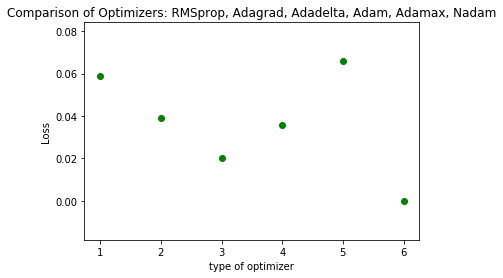

In [85]:
#Summary plot of Layer/Neruon Modulation
#figure of loss vs # of Layers
x_compare = [1,2,3,4,5,6]
y_compare = [scores_optimal_RMSprop, scores_optimal_Adagrad, scores_optimal_Adadelta, scores_optimal_Adam, scores_optimal_Adamax, scores_optimal_Nadam]

plt.scatter(x_compare,y_compare, c='g');
plt.title('Comparison of Optimizers: RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam')
plt.xlabel('type of optimizer')
plt.ylabel('Loss')

Observation: Nadam lowest loss in optimized neural network of 5 layers and 4 neurons per layer. 

# Part 2 - BYOD

https://www.youtube.com/watch?v=wQ8BIBpya2k&t=802s

In [86]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [87]:
#normalize/scale data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [88]:
#model
model = tf.keras.models.Sequential()

#imput layer
model.add(tf.keras.layers.Flatten())

#hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#training
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 52us/step - loss: 0.2676 - acc: 0.9214
Epoch 2/3
60000/60000 [==============================] - 3s 42us/step - loss: 0.1088 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 2s 42us/step - loss: 0.0757 - acc: 0.9765


In [89]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 39us/step
0.08536097722416744 0.9751
